In [1]:
import sympy as smp

r1, r2 = smp.symbols('r1 r2 ', real=True, positive=True)
theta = smp.symbols('theta')
theta1, phi1 = smp.symbols('theta_1 phi_1')
theta2, phi2 = smp.symbols('theta_2 phi_2')

x1 = smp.Function(r'x1')(r1, theta1, phi1)
x2 = smp.Function(r'x2')(r2, theta2, phi2)

y1 = smp.Function(r'x1')(r1, theta1, phi1)
y2 = smp.Function(r'x2')(r2, theta2, phi2)

z1 = smp.Function(r'x1')(r1, theta1)
z2 = smp.Function(r'x2')(r2, theta2)

Psi = smp.Function('Psi')(r1, r2)
V = smp.Function('V')(r1, r2)
absolute_diff = smp.sqrt(r1**2 + r2**2 - 2*r1*r2*smp.cos(theta))

V_eff = -2/r1 - 2/r2 + 1/(absolute_diff)
Laplacian = (1/r1**2) * smp.diff(r1**2 * smp.diff(Psi, r1), r1) + (1/r2**2) * smp.diff(r2**2 * smp.diff(Psi, r2), r2) + (1/(r1**2 * smp.sin(theta1)**2)) * smp.diff(smp.sin(theta1) * smp.diff(Psi, theta1), theta1) + (1/(r2**2 * smp.sin(theta2)**2)) * smp.diff(smp.sin(theta2) * smp.diff(Psi, theta2), theta2) + (1/(r1**2 * smp.sin(theta1)**2)) * smp.diff(smp.diff(Psi, phi1), phi1) + (1/(r2**2 * smp.sin(theta2)**2)) * smp.diff(smp.diff(Psi, phi2), phi2)

In [2]:
x1 = r1 * smp.sin(theta1) * smp.cos(phi1)
x2 = r2 * smp.sin(theta2) * smp.cos(phi2)

y1 = r1 * smp.sin(theta1) * smp.sin(phi1)
y2 = r2 * smp.sin(theta2) * smp.sin(phi2)

z1 = r1 * smp.cos(theta1)
z2 = r2 * smp.cos(theta2)

In [3]:
Phi_1 = smp.Function('\Phi_1')(r1, r2)
Phi_2 = smp.Function('\Phi_2')(r1, r2)
Phi_3 = smp.Function('\Phi_3')(r1, r2)
Phi_4 = smp.Function('\Phi_4')(r1, r2)
Phi_5 = smp.Function('\Phi_5')(r1, r2)
Phi_6 = smp.Function('\Phi_6')(r1, r2)
Phi_7 = smp.Function('\Phi_7')(r1, r2)

In [4]:
Phi_1 = smp.exp(-2 * (r1 + r2))
Phi_2 = smp.exp(-2 * (r1 + r2)) * (r1 + r2)
Phi_3 = smp.exp(-2 * (r1 + r2)) * (absolute_diff)
Phi_4 = smp.exp(-2 * (r1 + r2)) * r1 * r2
Phi_5 = smp.exp(-2 * (r1 + r2)) * (r1**2 + r2**2)
Phi_6 = smp.exp(-2 * (r1 + r2)) * (absolute_diff)**2
Phi_7 = smp.exp(-2 * (r1 + r2)) * (r1 + r2) * (absolute_diff)

In [5]:
r1_cartesian = smp.Matrix([x1, y1, z1])
r2_cartesian = smp.Matrix([x2, y2, z2])

# Compute the dot product
dot_product = r1_cartesian.dot(r2_cartesian)

magnitude_r1 = smp.sqrt(x1**2 + y1**2 + z1**2)
magnitude_r2 = smp.sqrt(x2**2 + y2**2 + z2**2)

# Compute cos(theta) and sin(theta)
cos_theta = dot_product / (magnitude_r1 * magnitude_r2)
sin_theta = smp.sqrt(1 - cos_theta**2)

In [6]:
Phi_1 = Phi_1.subs(smp.sin(theta), sin_theta).subs(smp.cos(theta), cos_theta)
Phi_2 = Phi_2.subs(smp.sin(theta), sin_theta).subs(smp.cos(theta), cos_theta)
Phi_3 = Phi_3.subs(smp.sin(theta), sin_theta).subs(smp.cos(theta), cos_theta)
Phi_4 = Phi_4.subs(smp.sin(theta), sin_theta).subs(smp.cos(theta), cos_theta)
Phi_5 = Phi_5.subs(smp.sin(theta), sin_theta).subs(smp.cos(theta), cos_theta)
Phi_6 = Phi_6.subs(smp.sin(theta), sin_theta).subs(smp.cos(theta), cos_theta)
Phi_7 = Phi_7.subs(smp.sin(theta), sin_theta).subs(smp.cos(theta), cos_theta)

In [7]:
V_eff = V_eff.subs(smp.sin(theta), sin_theta).subs(smp.cos(theta), cos_theta)
Hamiltonian = Laplacian + V * Psi

In [8]:
H_Phi_1 = Hamiltonian.subs({Psi: Phi_1, V:V_eff}).simplify()

In [9]:
H_Phi_2 = Hamiltonian.subs({Psi: Phi_2, V:V_eff}).simplify()

In [10]:
H_Phi_3 = Hamiltonian.subs({Psi: Phi_3, V:V_eff}).simplify()

In [11]:
H_Phi_4 = Hamiltonian.subs({Psi: Phi_4, V:V_eff}).simplify()

In [12]:
H_Phi_5 = Hamiltonian.subs({Psi: Phi_5, V:V_eff}).simplify()

In [14]:
H_Phi_6 = Hamiltonian.subs({Psi: Phi_6, V:V_eff}).simplify()

In [15]:
H_Phi_7 = Hamiltonian.subs({Psi: Phi_7, V:V_eff}).simplify()

In [16]:
f_11 = (Phi_1 * H_Phi_1) * r1**2 * r2**2
f_11 = f_11.simplify()
f_11

r1*r2*(8*r1*r2 + r1*r2/sqrt(r1**2 - 2*r1*r2*sin(theta_1)*sin(theta_2)*cos(phi_1 - phi_2) - 2*r1*r2*cos(theta_1)*cos(theta_2) + r2**2) - 6*r1 - 6*r2)*exp(-4*r1 - 4*r2)

In [17]:
f_22 = (Phi_2 * H_Phi_2) * r1**2 * r2**2
f_22 = f_22.simplify()
f_22

r1*r2*(r1 + r2)*(8*r1**2*r2 + r1**2*r2/sqrt(r1**2 - 2*r1*r2*sin(theta_1)*sin(theta_2)*cos(phi_1 - phi_2) - 2*r1*r2*cos(theta_1)*cos(theta_2) + r2**2) - 6*r1**2 + 8*r1*r2**2 + r1*r2**2/sqrt(r1**2 - 2*r1*r2*sin(theta_1)*sin(theta_2)*cos(phi_1 - phi_2) - 2*r1*r2*cos(theta_1)*cos(theta_2) + r2**2) - 20*r1*r2 + 2*r1 - 6*r2**2 + 2*r2)*exp(-4*r1 - 4*r2)

In [18]:
f_33 = (Phi_3 * H_Phi_3) * r1**2 * r2**2
f_33 = f_33.simplify()
f_33

r1*r2*(-r1*(r1**2 - 2*r1*r2*(sin(theta_1)*sin(theta_2)*cos(phi_1 - phi_2) + cos(theta_1)*cos(theta_2)) + r2**2)*(-r2*(r1**2 - 2*r1*r2*(sin(theta_1)*sin(theta_2)*cos(phi_1 - phi_2) + cos(theta_1)*cos(theta_2)) + r2**2 - (r1*(sin(theta_1)*sin(theta_2)*cos(phi_1 - phi_2) + cos(theta_1)*cos(theta_2)) - r2)**2 + 4*(r1*(sin(theta_1)*sin(theta_2)*cos(phi_1 - phi_2) + cos(theta_1)*cos(theta_2)) - r2)*(r1**2 - 2*r1*r2*(sin(theta_1)*sin(theta_2)*cos(phi_1 - phi_2) + cos(theta_1)*cos(theta_2)) + r2**2) + 4*(r1**2 - 2*r1*r2*(sin(theta_1)*sin(theta_2)*cos(phi_1 - phi_2) + cos(theta_1)*cos(theta_2)) + r2**2)**2) + 2*(r1*(sin(theta_1)*sin(theta_2)*cos(phi_1 - phi_2) + cos(theta_1)*cos(theta_2)) - r2)*(r1**2 - 2*r1*r2*(sin(theta_1)*sin(theta_2)*cos(phi_1 - phi_2) + cos(theta_1)*cos(theta_2)) + r2**2) + 4*(r1**2 - 2*r1*r2*(sin(theta_1)*sin(theta_2)*cos(phi_1 - phi_2) + cos(theta_1)*cos(theta_2)) + r2**2)**2) - r2*(r1**2 - 2*r1*r2*(sin(theta_1)*sin(theta_2)*cos(phi_1 - phi_2) + cos(theta_1)*cos(theta_2)

In [19]:
f_44 = (Phi_4 * H_Phi_4) * r1**2 * r2**2
f_44 = f_44.simplify()
f_44

r1**2*r2**2*(8*r1**2*r2**2 + r1**2*r2**2/sqrt(r1**2 - 2*r1*r2*sin(theta_1)*sin(theta_2)*cos(phi_1 - phi_2) - 2*r1*r2*cos(theta_1)*cos(theta_2) + r2**2) - 10*r1**2*r2 + 2*r1**2 - 10*r1*r2**2 + 2*r2**2)*exp(-4*r1 - 4*r2)

In [20]:
f_55 = (Phi_5 * H_Phi_5) * r1**2 * r2**2
f_55 = f_55.simplify()
f_55

r1*r2*(r1**2 + r2**2)*(8*r1**3*r2 + r1**3*r2/sqrt(r1**2 - 2*r1*r2*sin(theta_1)*sin(theta_2)*cos(phi_1 - phi_2) - 2*r1*r2*cos(theta_1)*cos(theta_2) + r2**2) - 6*r1**3 - 14*r1**2*r2 + 8*r1*r2**3 + r1*r2**3/sqrt(r1**2 - 2*r1*r2*sin(theta_1)*sin(theta_2)*cos(phi_1 - phi_2) - 2*r1*r2*cos(theta_1)*cos(theta_2) + r2**2) - 14*r1*r2**2 + 12*r1*r2 - 6*r2**3)*exp(-4*r1 - 4*r2)

In [22]:
f_66 = (Phi_6 * H_Phi_6) * r1**2 * r2**2
f_66 = f_66.simplify()
f_66

r1*r2*sqrt(r1**2 - 2*r1*r2*(sin(theta_1)*sin(theta_2)*cos(phi_1 - phi_2) + cos(theta_1)*cos(theta_2)) + r2**2)*(-2*r1*sqrt(r1**2 - 2*r1*r2*(sin(theta_1)*sin(theta_2)*cos(phi_1 - phi_2) + cos(theta_1)*cos(theta_2)) + r2**2)*(-2*r1**2*r2 + 2*r1**2 + 4*r1*r2**2*sin(theta_1)*sin(theta_2)*cos(phi_1 - phi_2) + 4*r1*r2**2*cos(theta_1)*cos(theta_2) - 8*r1*r2*sin(theta_1)*sin(theta_2)*cos(phi_1 - phi_2) - 8*r1*r2*cos(theta_1)*cos(theta_2) + 2*r1*sin(theta_1)*sin(theta_2)*cos(phi_1 - phi_2) + 2*r1*cos(theta_1)*cos(theta_2) - 2*r2**3 + 6*r2**2 - 3*r2) + 2*r2*sqrt(r1**2 - 2*r1*r2*(sin(theta_1)*sin(theta_2)*cos(phi_1 - phi_2) + cos(theta_1)*cos(theta_2)) + r2**2)*(2*r1**3 - 4*r1**2*r2*sin(theta_1)*sin(theta_2)*cos(phi_1 - phi_2) - 4*r1**2*r2*cos(theta_1)*cos(theta_2) - 6*r1**2 + 2*r1*r2**2 + 8*r1*r2*sin(theta_1)*sin(theta_2)*cos(phi_1 - phi_2) + 8*r1*r2*cos(theta_1)*cos(theta_2) + 3*r1 - 2*r2**2 - 2*r2*sin(theta_1)*sin(theta_2)*cos(phi_1 - phi_2) - 2*r2*cos(theta_1)*cos(theta_2)) - (r1**2 - 2*r1*r2

In [23]:
f_77 = (Phi_7 * H_Phi_7) * r1**2 * r2**2
f_77 = f_77.simplify()
f_77

-r1*r2*(r1 + r2)*(r1*(r1**2 - 2*r1*r2*(sin(theta_1)*sin(theta_2)*cos(phi_1 - phi_2) + cos(theta_1)*cos(theta_2)) + r2**2)*(-r2*(-r1**2*(r1 + r2)*(sin(theta_1)**2*sin(theta_2)**2*cos(phi_1 - phi_2)**2 + 2*sin(theta_1)*sin(theta_2)*cos(theta_1)*cos(theta_2)*cos(phi_1 - phi_2) + cos(theta_1)**2*cos(theta_2)**2 - 1) + 4*(r1 + r2 - 1)*(r1**2 - 2*r1*r2*(sin(theta_1)*sin(theta_2)*cos(phi_1 - phi_2) + cos(theta_1)*cos(theta_2)) + r2**2)**2 + 2*(r1**2 - 2*r1*r2*(sin(theta_1)*sin(theta_2)*cos(phi_1 - phi_2) + cos(theta_1)*cos(theta_2)) + r2**2)*(-r1*(sin(theta_1)*sin(theta_2)*cos(phi_1 - phi_2) + cos(theta_1)*cos(theta_2)) + r2 + 2*(r1 + r2)*(r1*(sin(theta_1)*sin(theta_2)*cos(phi_1 - phi_2) + cos(theta_1)*cos(theta_2)) - r2))) + 2*(r1 + r2)*(r1*(sin(theta_1)*sin(theta_2)*cos(phi_1 - phi_2) + cos(theta_1)*cos(theta_2)) - r2)*(r1**2 - 2*r1*r2*(sin(theta_1)*sin(theta_2)*cos(phi_1 - phi_2) + cos(theta_1)*cos(theta_2)) + r2**2) + 2*(2*r1 + 2*r2 - 1)*(r1**2 - 2*r1*r2*(sin(theta_1)*sin(theta_2)*cos(phi

In [24]:
f_11_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], f_11)
f_22_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], f_22)
f_33_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], f_33)
f_44_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], f_44)
f_55_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], f_55)
f_66_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], f_66)
f_77_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], f_77)

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

r1 = np.linspace(0, 10, 1000)
r2 = np.linspace(0, 10, 1000)

theta1 = np.linspace(0, np.pi, 1000)
theta2 = np.linspace(0, np.pi, 1000)

phi1 = np.linspace(0, 2*np.pi, 1000)
phi2 = np.linspace(0, 2*np.pi, 1000)

R1, R2 = np.meshgrid(r1, r2)
Theta1, Theta2 = np.meshgrid(theta1, theta2)
Phi1, Phi2 = np.meshgrid(phi1, phi2)

In [26]:
F_11_2d = f_11_f(r1, np.pi/6, np.pi/2, 0.522, np.pi/4, 3*np.pi/4)
F_22_2d = f_22_f(r1, np.pi/6, np.pi/2, 0.522, np.pi/4, 3*np.pi/4)
F_33_2d = f_33_f(r1, np.pi/6, np.pi/2, 0.522, np.pi/4, 3*np.pi/4)
F_44_2d = f_44_f(r1, np.pi/6, np.pi/2, 0.522, np.pi/4, 3*np.pi/4)
F_55_2d = f_55_f(r1, np.pi/6, np.pi/2, 0.522, np.pi/4, 3*np.pi/4)
F_66_2d = f_66_f(r1, np.pi/6, np.pi/2, 0.522, np.pi/4, 3*np.pi/4)
F_77_2d = f_77_f(r1, np.pi/6, np.pi/2, 0.522, np.pi/4, 3*np.pi/4)

## These are arrays of shape (100,)

In [27]:
F_2d = F_11_2d + F_22_2d + F_33_2d + F_44_2d + F_55_2d + F_66_2d + F_77_2d

## This is also the Sampling function P with all coefficients equal to 1

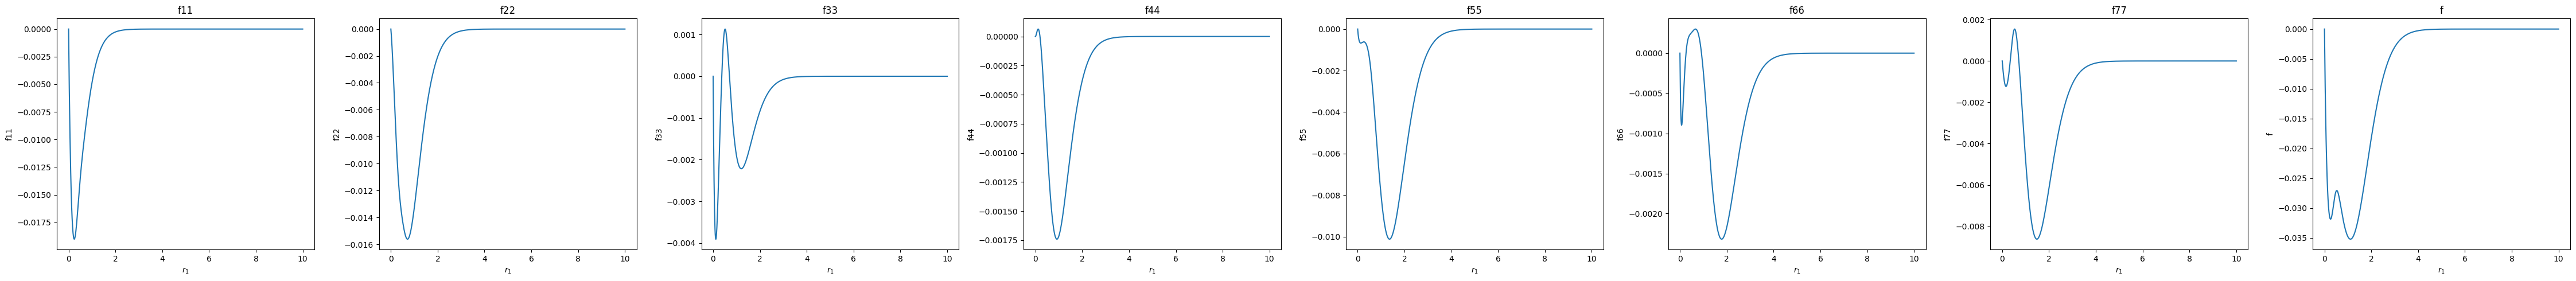

In [28]:
fig, axes = plt.subplots(1,8 ,figsize=(45,5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# List of y data to plot
functions = [F_11_2d, F_22_2d, F_33_2d, F_44_2d, F_55_2d, F_66_2d, F_77_2d, F_2d]
titles = ['f11', 'f22', 'f33', 'f44', 'f55', 'f66', 'f77', 'f']

# Plot each y data on a subplot
for i, ax in enumerate(axes):
    # ax = fig.add_subplot(projection='3d')
    ax.plot(r1, functions[i])
    ax.set_xlabel('$r_1$')
    ax.set_ylabel(titles[i])
    ax.set_title(titles[i])

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [29]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K

# Sample data
f = [F_11_2d, F_22_2d, F_33_2d, F_44_2d, F_55_2d, F_66_2d, F_77_2d]

In [30]:
coefficients = tf.Variable(np.ones(7), dtype = tf.float32)
coefficients

<tf.Variable 'Variable:0' shape=(7,) dtype=float32, numpy=array([1., 1., 1., 1., 1., 1., 1.], dtype=float32)>

In [31]:
# Define the sampling function p

def sampling_function(coefficients, f):

  p = sum(coefficients[i] * f[i] for i in range(7))
  return p

# Define the custom loss function
def variance_loss(f, p):
    loss = 0
    for i in range(7):
        ratio = f[i] / (p + 1e-6) # f/p will be an array of 100 elements

        # Filter out nan and inf values from the array
        mask_f_ii_p = tf.math.logical_not(tf.math.is_nan(ratio)) & tf.math.logical_not(tf.math.is_inf(ratio))
        ratio_new = tf.boolean_mask(ratio, mask_f_ii_p)

        variance = tf.math.reduce_variance(ratio_new) # Gives the variance of the new array
        loss += variance

    return loss

In [32]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)  # Using Stochastic Gradient Descent(SGD) as an optimizer
# Training step
@tf.function
def train_step():

    with tf.GradientTape() as tape:

        p = sampling_function(coefficients, f)
        loss = variance_loss(f, p)

    gradients = tape.gradient(loss, [coefficients])
    clipped_gradients = [tf.clip_by_value(grad, -1,1) for grad in gradients]
    optimizer.apply_gradients(zip(gradients, [coefficients]))

    return loss

In [33]:
# Training loop
epochs = 1000
for epoch in range(epochs):
    loss = train_step()
    if epoch % 100 == 0:
      print(f'Epoch {epoch}, Loss: {loss.numpy()}')

Epoch 0, Loss: 3.7777109146118164
Epoch 100, Loss: 0.0014592425432056189
Epoch 200, Loss: 0.0014587404439225793
Epoch 300, Loss: 0.0014582392759621143
Epoch 400, Loss: 0.0014577382244169712
Epoch 500, Loss: 0.0014572374057024717
Epoch 600, Loss: 0.0014567438047379255
Epoch 700, Loss: 0.0014562435681000352
Epoch 800, Loss: 0.0014557436807081103
Epoch 900, Loss: 0.001455244142562151


In [34]:
# Best coefficients
best_coefficients = coefficients.numpy()
print("Best coefficients:", best_coefficients)

Best coefficients: [  1.1946725   9.2825575   6.948795    3.0246935 253.04787   181.13844
 257.01688  ]


In [35]:
p = best_coefficients[0] * F_11_2d + best_coefficients[1] * F_22_2d + best_coefficients[2] * F_33_2d + best_coefficients[3]  * F_44_2d + best_coefficients[4] * F_55_2d + best_coefficients[5] * F_66_2d + best_coefficients[6] * F_77_2d
p = p/257.01688 # To normalize P

## An array of 100 elements

In [36]:
# The final optimized coefficients after normalization (that are included in p)

coefficients_normalized = best_coefficients/257.01688
print("Best coefficients after normalization:", coefficients_normalized)

Best coefficients after normalization: [0.00464823 0.03611653 0.02703634 0.01176846 0.9845574  0.7047726
 1.        ]


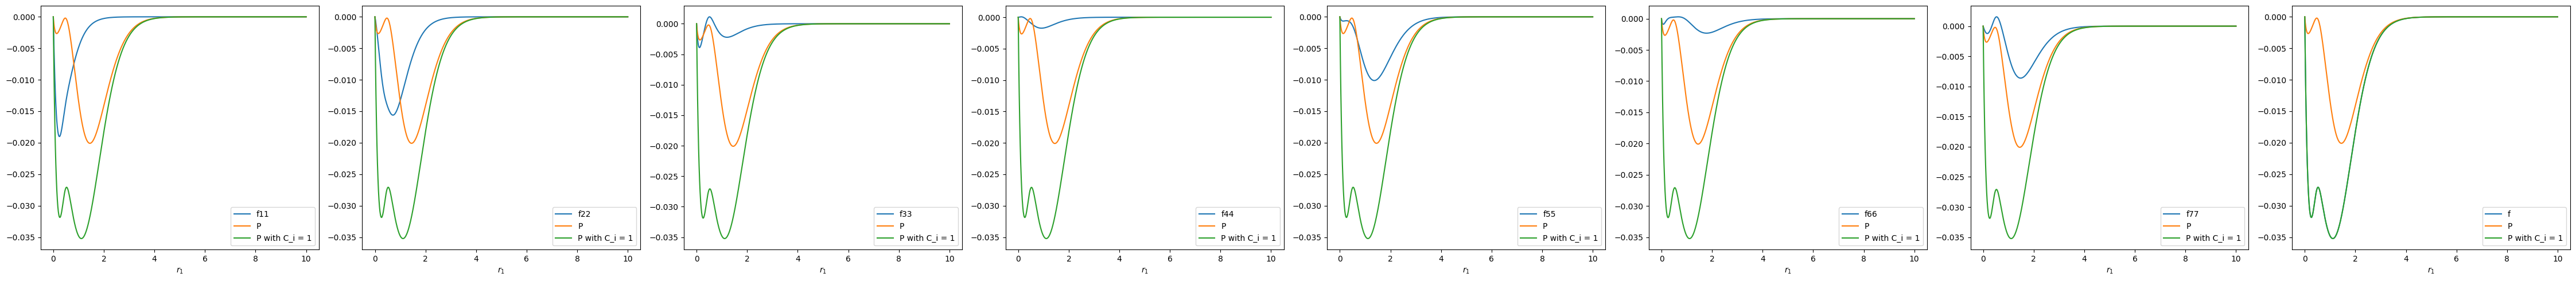

In [37]:
fig, axes = plt.subplots(1,8 ,figsize=(45,5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# List of y data to plot
functions = [F_11_2d, F_22_2d, F_33_2d, F_44_2d, F_55_2d, F_66_2d, F_77_2d, F_2d]
titles = ['f11', 'f22', 'f33', 'f44', 'f55', 'f66', 'f77', 'f']

# Plot each y data on a subplot
for i, ax in enumerate(axes):
    # ax = fig.add_subplot(projection='3d')
    ax.plot(r1, functions[i], label =titles[i])
    ax.plot(r1, p, label='P')
    ax.plot(r1, F_2d, label='P with C_i = 1')
    ax.set_xlabel('$r_1$')
    ax.legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [38]:
f11_over_p = F_11_2d/p
f22_over_p = F_22_2d/p
f33_over_p = F_33_2d/p
f44_over_p = F_44_2d/p
f55_over_p = F_55_2d/p
f66_over_p = F_66_2d/p
f77_over_p = F_77_2d/p
f_over_p = F_2d/p

<ipython-input-38-9f2fa32ca026>:1: RuntimeWarning: invalid value encountered in divide
  f11_over_p = F_11_2d/p
<ipython-input-38-9f2fa32ca026>:2: RuntimeWarning: invalid value encountered in divide
  f22_over_p = F_22_2d/p
<ipython-input-38-9f2fa32ca026>:3: RuntimeWarning: invalid value encountered in divide
  f33_over_p = F_33_2d/p
<ipython-input-38-9f2fa32ca026>:4: RuntimeWarning: invalid value encountered in divide
  f44_over_p = F_44_2d/p
<ipython-input-38-9f2fa32ca026>:5: RuntimeWarning: invalid value encountered in divide
  f55_over_p = F_55_2d/p
<ipython-input-38-9f2fa32ca026>:6: RuntimeWarning: invalid value encountered in divide
  f66_over_p = F_66_2d/p
<ipython-input-38-9f2fa32ca026>:7: RuntimeWarning: invalid value encountered in divide
  f77_over_p = F_77_2d/p
<ipython-input-38-9f2fa32ca026>:8: RuntimeWarning: invalid value encountered in divide
  f_over_p = F_2d/p


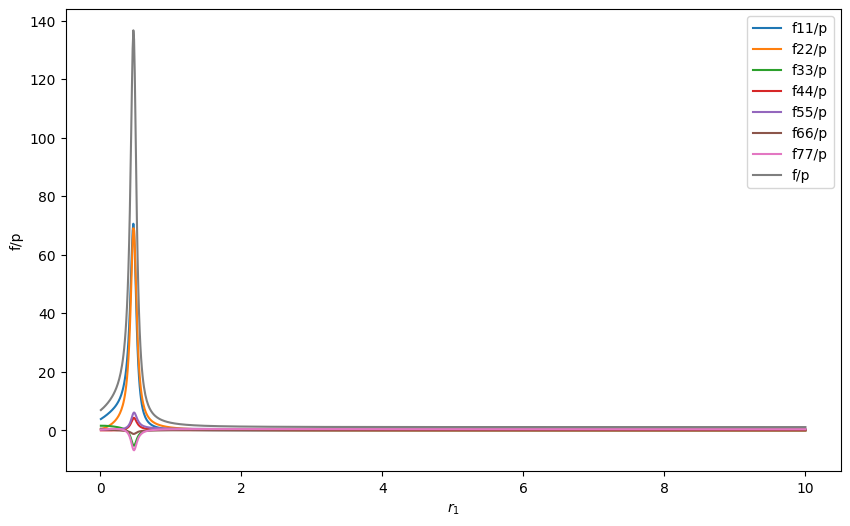

In [39]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(r1, f11_over_p, label='f11/p')
ax.plot(r1, f22_over_p, label='f22/p')
ax.plot(r1, f33_over_p, label='f33/p')
ax.plot(r1, f44_over_p, label='f44/p')
ax.plot(r1, f55_over_p, label='f55/p')
ax.plot(r1, f66_over_p, label='f66/p')
ax.plot(r1, f77_over_p, label='f77/p')
ax.plot(r1, f_over_p, label='f/p')

ax.set_xlabel('$r_1$')
ax.set_ylabel('f/p')
ax.legend()

plt.show()

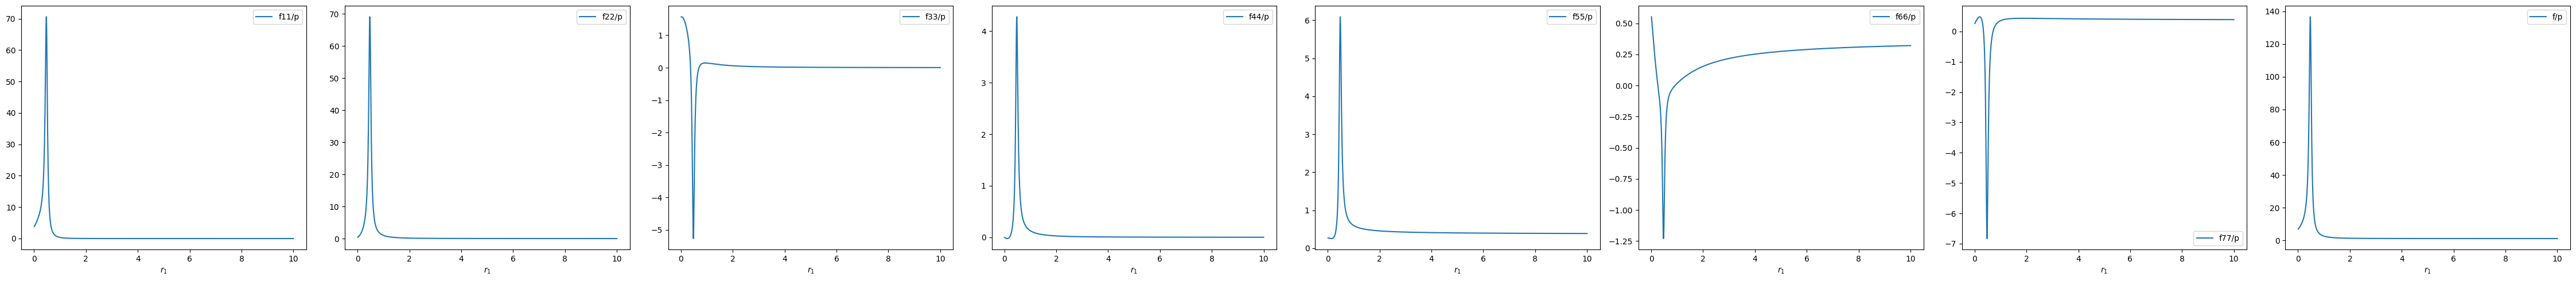

In [40]:
fig, axes = plt.subplots(1,8 ,figsize=(45,5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# List of y data to plot
functions = [f11_over_p, f22_over_p, f33_over_p, f44_over_p, f55_over_p, f66_over_p, f77_over_p, f_over_p]
titles = ['f11/p', 'f22/p', 'f33/p', 'f44/p', 'f55/p', 'f66/p', 'f77/p', 'f/p']

# Plot each y data on a subplot
for i, ax in enumerate(axes):
    # ax = fig.add_subplot(projection='3d')
    ax.plot(r1, functions[i], label =titles[i])
    ax.set_xlabel('$r_1$')
    ax.legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [41]:
coefficients_1 = tf.Variable(-np.ones(7), dtype = tf.float32)
coefficients_1

<tf.Variable 'Variable:0' shape=(7,) dtype=float32, numpy=array([-1., -1., -1., -1., -1., -1., -1.], dtype=float32)>

In [42]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)  # Using Stochastic Gradient Descent(SGD) as an optimizer
# optimizer.build([coefficients])
# Training step
@tf.function
def train_step_1():

    with tf.GradientTape() as tape:

        p_1 = sampling_function(coefficients_1, f)
        loss_1 = variance_loss(f, p_1)

    gradients_1 = tape.gradient(loss_1, [coefficients_1])
    clipped_gradients = [tf.clip_by_value(grad, -1,1) for grad in gradients_1]
    optimizer.apply_gradients(zip(gradients_1, [coefficients_1]))

    return loss_1

In [43]:
# Training loop
epochs = 1000
for epoch in range(epochs):
    loss_1 = train_step_1()
    if epoch % 100 == 0:
      print(f'Epoch {epoch}, Loss: {loss_1.numpy()}')

Epoch 0, Loss: 0.09742417931556702
Epoch 100, Loss: 0.09086443483829498
Epoch 200, Loss: 0.08548018336296082
Epoch 300, Loss: 0.0809566006064415
Epoch 400, Loss: 0.07708573341369629
Epoch 500, Loss: 0.0737239420413971
Epoch 600, Loss: 0.07076837122440338
Epoch 700, Loss: 0.06814312934875488
Epoch 800, Loss: 0.06579077243804932
Epoch 900, Loss: 0.06366702914237976


In [44]:
# Best coefficients
best_coefficients_1 = coefficients_1.numpy()
print("Best coefficients:", best_coefficients_1)

Best coefficients: [-1.2352879 -1.2450285 -1.040646  -1.0227792 -1.333943  -1.1574167
 -1.298985 ]


In [45]:
p_1 = best_coefficients_1[0] * F_11_2d + best_coefficients_1[1] * F_22_2d + best_coefficients_1[2] * F_33_2d + best_coefficients_1[3]  * F_44_2d + best_coefficients_1[4] * F_55_2d + best_coefficients_1[5] * F_66_2d + best_coefficients_1[6] * F_77_2d
p_1 = p_1/-1.333943
## An array of 100 elements

In [46]:
# The final optimized coefficients after normalization (that are included in p_1)

coefficients_normalized_1 = best_coefficients_1/-1.333943
print("Best coefficients after normalization:", coefficients_normalized_1)

Best coefficients after normalization: [0.9260425  0.9333446  0.78012776 0.7667338  1.         0.86766577
 0.9737935 ]


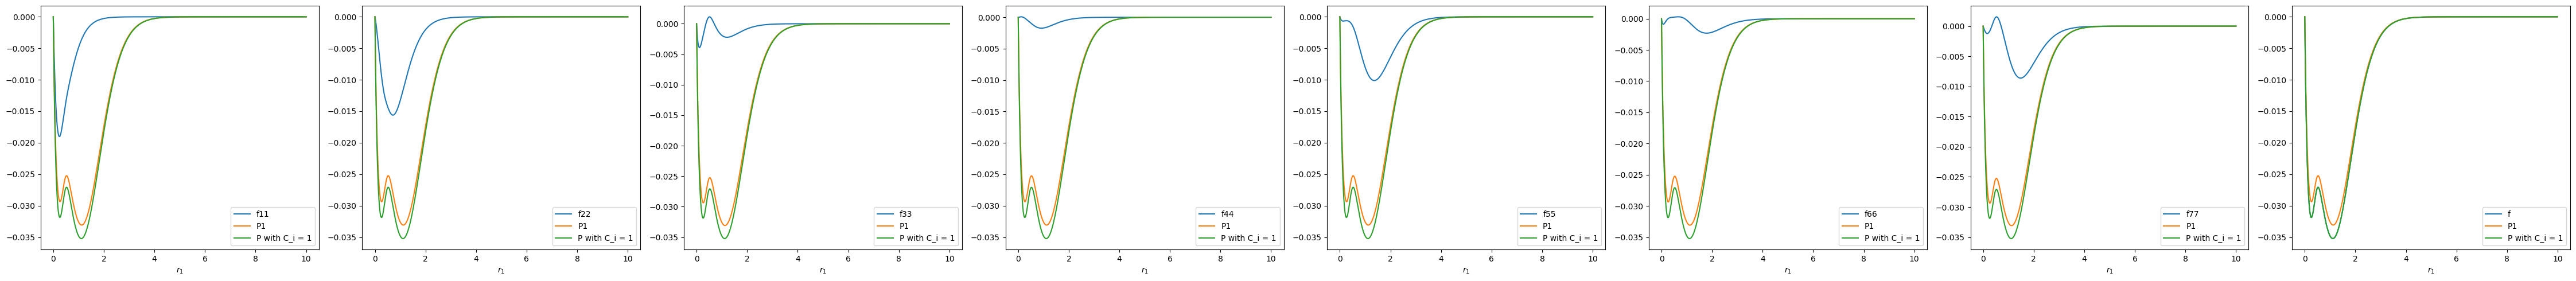

In [47]:
fig, axes = plt.subplots(1,8 ,figsize=(45,5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# List of y data to plot
functions = [F_11_2d, F_22_2d, F_33_2d, F_44_2d, F_55_2d, F_66_2d, F_77_2d, F_2d]
titles = ['f11', 'f22', 'f33', 'f44', 'f55', 'f66', 'f77', 'f']

# Plot each y data on a subplot
for i, ax in enumerate(axes):
    # ax = fig.add_subplot(projection='3d')
    ax.plot(r1, functions[i], label =titles[i])
    ax.plot(r1, p_1, label='P1')
    ax.plot(r1, F_2d, label='P with C_i = 1')
    ax.set_xlabel('$r_1$')
    ax.legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [48]:
f11_over_p1 = F_11_2d/p_1
f22_over_p1 = F_22_2d/p_1
f33_over_p1 = F_33_2d/p_1
f44_over_p1 = F_44_2d/p_1
f55_over_p1 = F_55_2d/p_1
f66_over_p1 = F_66_2d/p_1
f77_over_p1 = F_77_2d/p_1
f_over_p1 = F_2d/p_1

<ipython-input-48-c38ed65b6ef7>:1: RuntimeWarning: invalid value encountered in divide
  f11_over_p1 = F_11_2d/p_1
<ipython-input-48-c38ed65b6ef7>:2: RuntimeWarning: invalid value encountered in divide
  f22_over_p1 = F_22_2d/p_1
<ipython-input-48-c38ed65b6ef7>:3: RuntimeWarning: invalid value encountered in divide
  f33_over_p1 = F_33_2d/p_1
<ipython-input-48-c38ed65b6ef7>:4: RuntimeWarning: invalid value encountered in divide
  f44_over_p1 = F_44_2d/p_1
<ipython-input-48-c38ed65b6ef7>:5: RuntimeWarning: invalid value encountered in divide
  f55_over_p1 = F_55_2d/p_1
<ipython-input-48-c38ed65b6ef7>:6: RuntimeWarning: invalid value encountered in divide
  f66_over_p1 = F_66_2d/p_1
<ipython-input-48-c38ed65b6ef7>:7: RuntimeWarning: invalid value encountered in divide
  f77_over_p1 = F_77_2d/p_1
<ipython-input-48-c38ed65b6ef7>:8: RuntimeWarning: invalid value encountered in divide
  f_over_p1 = F_2d/p_1


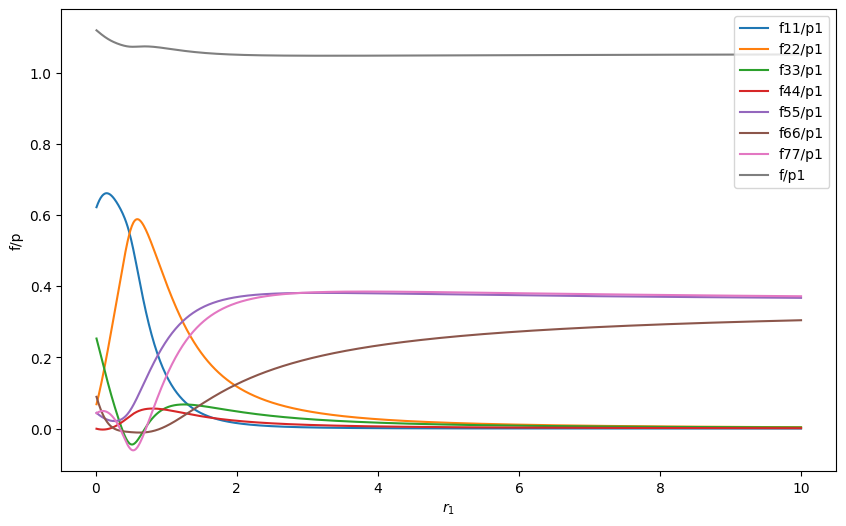

In [49]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(r1, f11_over_p1, label='f11/p1')
ax.plot(r1, f22_over_p1, label='f22/p1')
ax.plot(r1, f33_over_p1, label='f33/p1')
ax.plot(r1, f44_over_p1, label='f44/p1')
ax.plot(r1, f55_over_p1, label='f55/p1')
ax.plot(r1, f66_over_p1, label='f66/p1')
ax.plot(r1, f77_over_p1, label='f77/p1')
ax.plot(r1, f_over_p1, label='f/p1')

ax.set_xlabel('$r_1$')
ax.set_ylabel('f/p')
ax.legend()

plt.show()

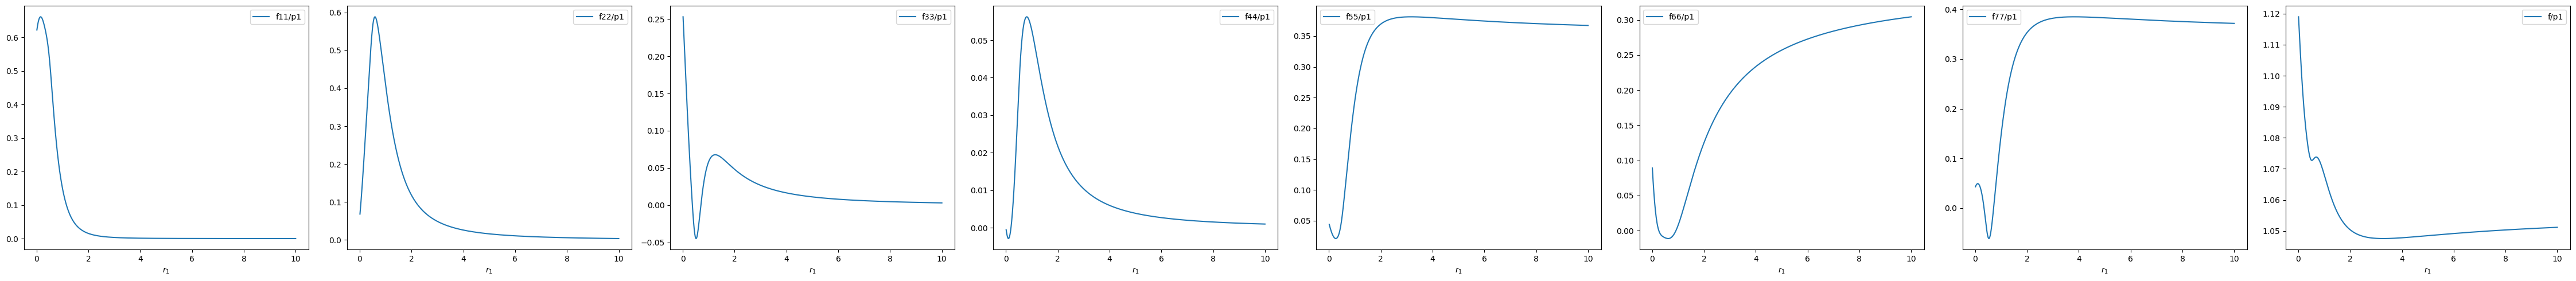

In [50]:
fig, axes = plt.subplots(1,8 ,figsize=(45,5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# List of y data to plot
functions = [f11_over_p1, f22_over_p1, f33_over_p1, f44_over_p1, f55_over_p1, f66_over_p1, f77_over_p1, f_over_p1]
titles = ['f11/p1', 'f22/p1', 'f33/p1', 'f44/p1', 'f55/p1', 'f66/p1', 'f77/p1', 'f/p1']

# Plot each y data on a subplot
for i, ax in enumerate(axes):
    ax.plot(r1, functions[i], label =titles[i])
    ax.set_xlabel('$r_1$')
    ax.legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [51]:
coefficients_2 = tf.Variable(np.random.uniform(-1, 1, size=(7,)), dtype=tf.float32)
coefficients_2 # Random coefficients between -1 to 1

<tf.Variable 'Variable:0' shape=(7,) dtype=float32, numpy=
array([ 0.13173653, -0.431423  , -0.1132217 ,  0.70350325, -0.66980416,
       -0.13801308,  0.26949307], dtype=float32)>

In [52]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)  # Using Stochastic Gradient Descent(SGD) as an optimizer
# optimizer.build([coefficients])
# Training step
@tf.function
def train_step_2():

    with tf.GradientTape() as tape:

        p_2 = sampling_function(coefficients_2, f)
        loss_2 = variance_loss(f, p_2)

    gradients_2 = tape.gradient(loss_2, [coefficients_2])
    clipped_gradients = [tf.clip_by_value(grad, -1,1) for grad in gradients_2]
    optimizer.apply_gradients(zip(gradients_2, [coefficients_2]))

    return loss_2

In [53]:
# Training loop
epochs = 1000
for epoch in range(epochs):
    loss_2 = train_step_2()
    if epoch % 100 == 0:
      print(f'Epoch {epoch}, Loss: {loss_2.numpy()}')

Epoch 0, Loss: 83.7800064086914
Epoch 100, Loss: 0.0005446027498692274
Epoch 200, Loss: 0.0005446027498692274
Epoch 300, Loss: 0.0005446027498692274
Epoch 400, Loss: 0.0005446027498692274
Epoch 500, Loss: 0.0005446027498692274
Epoch 600, Loss: 0.0005446027498692274
Epoch 700, Loss: 0.0005446027498692274
Epoch 800, Loss: 0.0005446027498692274
Epoch 900, Loss: 0.0005446027498692274


In [54]:
# Best coefficients
best_coefficients_2 = coefficients_2.numpy()
print("Best coefficients:", best_coefficients_2)

Best coefficients: [-124.56664    -19.76085    -44.28342      1.0353858   -8.295447
  -13.5283985   -8.827137 ]


In [55]:
p_2 = best_coefficients_2[0] * F_11_2d + best_coefficients_2[1] * F_22_2d + best_coefficients_2[2] * F_33_2d + best_coefficients_2[3]  * F_44_2d + best_coefficients_2[4] * F_55_2d + best_coefficients_2[5] * F_66_2d + best_coefficients_2[6] * F_77_2d
p_2 = p_2/-124.56664
## An array of 100 elements

In [56]:
# The final optimized coefficients after normalization (that are included in p_2)

coefficients_normalized_2 = best_coefficients_2/-124.56664
print("Best coefficients after normalization:", coefficients_normalized_2)

Best coefficients after normalization: [ 1.          0.15863678  0.35549983 -0.0083119   0.06659445  0.1086037
  0.07086277]


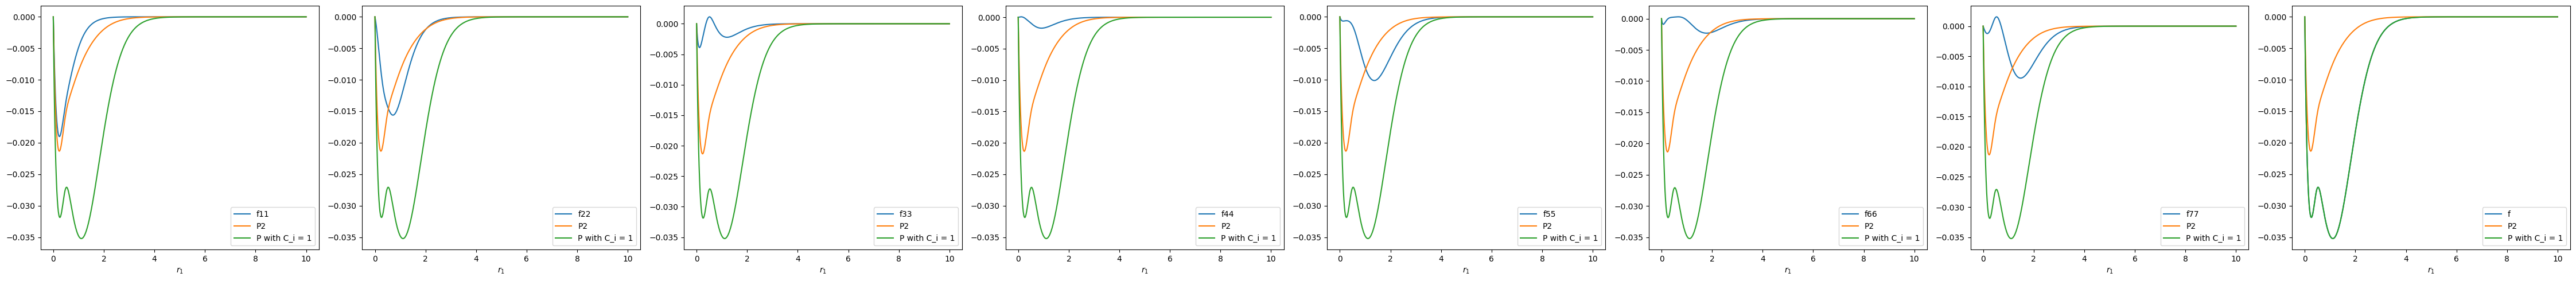

In [57]:
fig, axes = plt.subplots(1,8 ,figsize=(45,5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# List of y data to plot
functions = [F_11_2d, F_22_2d, F_33_2d, F_44_2d, F_55_2d, F_66_2d, F_77_2d, F_2d]
titles = ['f11', 'f22', 'f33', 'f44', 'f55', 'f66', 'f77', 'f']

# Plot each y data on a subplot
for i, ax in enumerate(axes):
    # ax = fig.add_subplot(projection='3d')
    ax.plot(r1, functions[i], label =titles[i])
    ax.plot(r1, p_2, label='P2')
    ax.plot(r1, F_2d, label='P with C_i = 1')
    ax.set_xlabel('$r_1$')
    ax.legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [58]:
f11_over_p2 = F_11_2d/p_2
f22_over_p2 = F_22_2d/p_2
f33_over_p2 = F_33_2d/p_2
f44_over_p2 = F_44_2d/p_2
f55_over_p2 = F_55_2d/p_2
f66_over_p2 = F_66_2d/p_2
f77_over_p2 = F_77_2d/p_2
f_over_p2 = F_2d/p_2

<ipython-input-58-fa2ee0e48d39>:1: RuntimeWarning: invalid value encountered in divide
  f11_over_p2 = F_11_2d/p_2
<ipython-input-58-fa2ee0e48d39>:2: RuntimeWarning: invalid value encountered in divide
  f22_over_p2 = F_22_2d/p_2
<ipython-input-58-fa2ee0e48d39>:3: RuntimeWarning: invalid value encountered in divide
  f33_over_p2 = F_33_2d/p_2
<ipython-input-58-fa2ee0e48d39>:4: RuntimeWarning: invalid value encountered in divide
  f44_over_p2 = F_44_2d/p_2
<ipython-input-58-fa2ee0e48d39>:5: RuntimeWarning: invalid value encountered in divide
  f55_over_p2 = F_55_2d/p_2
<ipython-input-58-fa2ee0e48d39>:6: RuntimeWarning: invalid value encountered in divide
  f66_over_p2 = F_66_2d/p_2
<ipython-input-58-fa2ee0e48d39>:7: RuntimeWarning: invalid value encountered in divide
  f77_over_p2 = F_77_2d/p_2
<ipython-input-58-fa2ee0e48d39>:8: RuntimeWarning: invalid value encountered in divide
  f_over_p2 = F_2d/p_2


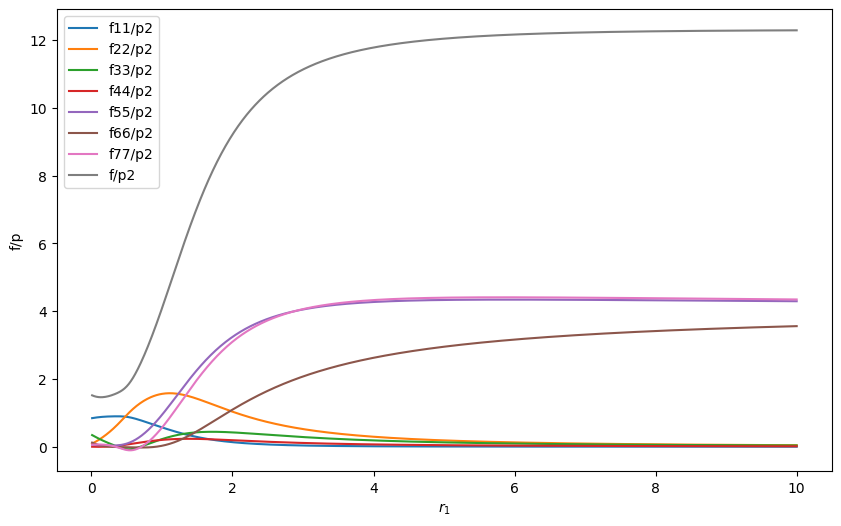

In [59]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(r1, f11_over_p2, label='f11/p2')
ax.plot(r1, f22_over_p2, label='f22/p2')
ax.plot(r1, f33_over_p2, label='f33/p2')
ax.plot(r1, f44_over_p2, label='f44/p2')
ax.plot(r1, f55_over_p2, label='f55/p2')
ax.plot(r1, f66_over_p2, label='f66/p2')
ax.plot(r1, f77_over_p2, label='f77/p2')
ax.plot(r1, f_over_p2, label='f/p2')

ax.set_xlabel('$r_1$')
ax.set_ylabel('f/p')
ax.legend()

plt.show()

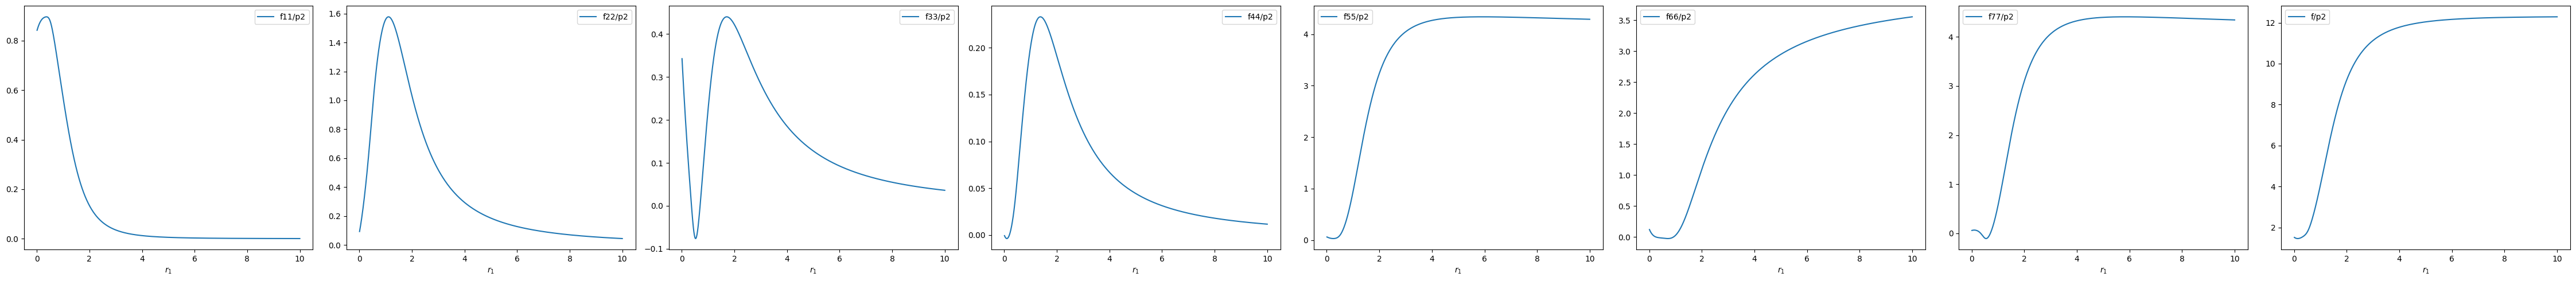

In [60]:
fig, axes = plt.subplots(1,8 ,figsize=(45,5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# List of y data to plot
functions = [f11_over_p2, f22_over_p2, f33_over_p2, f44_over_p2, f55_over_p2, f66_over_p2, f77_over_p2, f_over_p2]
titles = ['f11/p2', 'f22/p2', 'f33/p2', 'f44/p2', 'f55/p2', 'f66/p2', 'f77/p2', 'f/p2']

# Plot each y data on a subplot
for i, ax in enumerate(axes):
    ax.plot(r1, functions[i], label =titles[i])
    ax.set_xlabel('$r_1$')
    ax.legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [61]:
coefficients_3 = tf.Variable(np.random.uniform(0.99, 1, size=(7,)), dtype=tf.float32)
coefficients_3 # The coefficients chosen are all very close to 1

<tf.Variable 'Variable:0' shape=(7,) dtype=float32, numpy=
array([0.9925605 , 0.9972755 , 0.99925464, 0.99510896, 0.9938702 ,
       0.99422956, 0.9907248 ], dtype=float32)>

In [62]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)  # Using Stochastic Gradient Descent(SGD) as an optimizer

# Training step
@tf.function
def train_step_3():

    with tf.GradientTape() as tape:

        p_3 = sampling_function(coefficients_3, f)
        loss_3 = variance_loss(f, p_3)

    gradients_3 = tape.gradient(loss_3, [coefficients_3])
    clipped_gradients = [tf.clip_by_value(grad, -1,1) for grad in gradients_3]
    optimizer.apply_gradients(zip(gradients_3, [coefficients_3]))

    return loss_3

In [63]:
# Training loop
epochs = 1000
for epoch in range(epochs):
    loss_3 = train_step_3()
    if epoch % 100 == 0:
      print(f'Epoch {epoch}, Loss: {loss_3.numpy()}')

Epoch 0, Loss: 4.6174516677856445
Epoch 100, Loss: 0.22152312099933624
Epoch 200, Loss: 0.22152173519134521
Epoch 300, Loss: 0.221520334482193
Epoch 400, Loss: 0.22152157127857208
Epoch 500, Loss: 0.22152027487754822
Epoch 600, Loss: 0.22152143716812134
Epoch 700, Loss: 0.22152142226696014
Epoch 800, Loss: 0.22152002155780792
Epoch 900, Loss: 0.22151996195316315


In [64]:
# Best coefficients
best_coefficients_3 = coefficients_3.numpy()
print("Best coefficients:", best_coefficients_3)

Best coefficients: [10.190601  22.972994   3.2938845  3.6386962  8.3356695 -1.4088871
  2.8690524]


In [65]:
p_3 = best_coefficients_3[0] * F_11_2d + best_coefficients_3[1] * F_22_2d + best_coefficients_3[2] * F_33_2d + best_coefficients_3[3]  * F_44_2d + best_coefficients_3[4] * F_55_2d + best_coefficients_3[5] * F_66_2d + best_coefficients_3[6] * F_77_2d
p_3 = p_3/22.972994
## An array of 100 elements

In [66]:
# The final optimized coefficients after normalization (that are included in p_3)

coefficients_normalized_3 = best_coefficients_3/22.972994
print("Best coefficients after normalization:", coefficients_normalized_3)

Best coefficients after normalization: [ 0.4435905   1.          0.14338073  0.15839016  0.36284646 -0.06132797
  0.12488805]


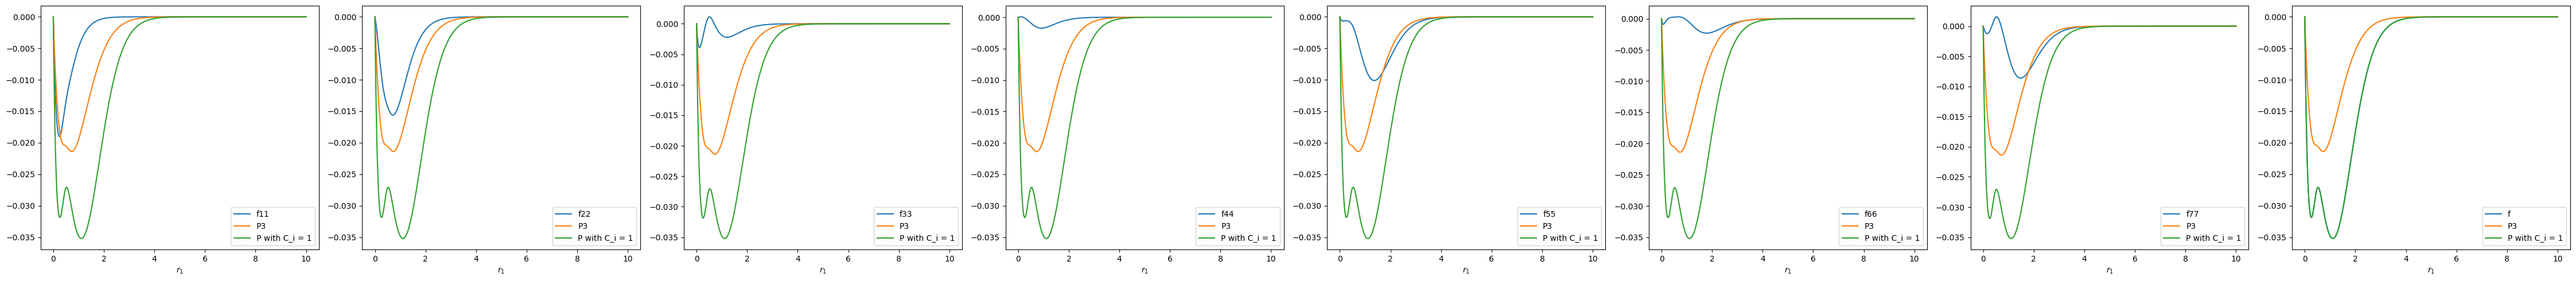

In [67]:
fig, axes = plt.subplots(1,8 ,figsize=(45,5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# List of y data to plot
functions = [F_11_2d, F_22_2d, F_33_2d, F_44_2d, F_55_2d, F_66_2d, F_77_2d, F_2d]
titles = ['f11', 'f22', 'f33', 'f44', 'f55', 'f66', 'f77', 'f']

# Plot each y data on a subplot
for i, ax in enumerate(axes):
    ax.plot(r1, functions[i], label =titles[i])
    ax.plot(r1, p_3, label='P3')
    ax.plot(r1, F_2d, label='P with C_i = 1')
    ax.set_xlabel('$r_1$')
    ax.legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [68]:
f11_over_p3 = F_11_2d/p_3
f22_over_p3 = F_22_2d/p_3
f33_over_p3 = F_33_2d/p_3
f44_over_p3 = F_44_2d/p_3
f55_over_p3 = F_55_2d/p_3
f66_over_p3 = F_66_2d/p_3
f77_over_p3 = F_77_2d/p_3
f_over_p3 = F_2d/p_3

<ipython-input-68-e151a3f9b41e>:1: RuntimeWarning: invalid value encountered in divide
  f11_over_p3 = F_11_2d/p_3
<ipython-input-68-e151a3f9b41e>:2: RuntimeWarning: invalid value encountered in divide
  f22_over_p3 = F_22_2d/p_3
<ipython-input-68-e151a3f9b41e>:3: RuntimeWarning: invalid value encountered in divide
  f33_over_p3 = F_33_2d/p_3
<ipython-input-68-e151a3f9b41e>:4: RuntimeWarning: invalid value encountered in divide
  f44_over_p3 = F_44_2d/p_3
<ipython-input-68-e151a3f9b41e>:5: RuntimeWarning: invalid value encountered in divide
  f55_over_p3 = F_55_2d/p_3
<ipython-input-68-e151a3f9b41e>:6: RuntimeWarning: invalid value encountered in divide
  f66_over_p3 = F_66_2d/p_3
<ipython-input-68-e151a3f9b41e>:7: RuntimeWarning: invalid value encountered in divide
  f77_over_p3 = F_77_2d/p_3
<ipython-input-68-e151a3f9b41e>:8: RuntimeWarning: invalid value encountered in divide
  f_over_p3 = F_2d/p_3


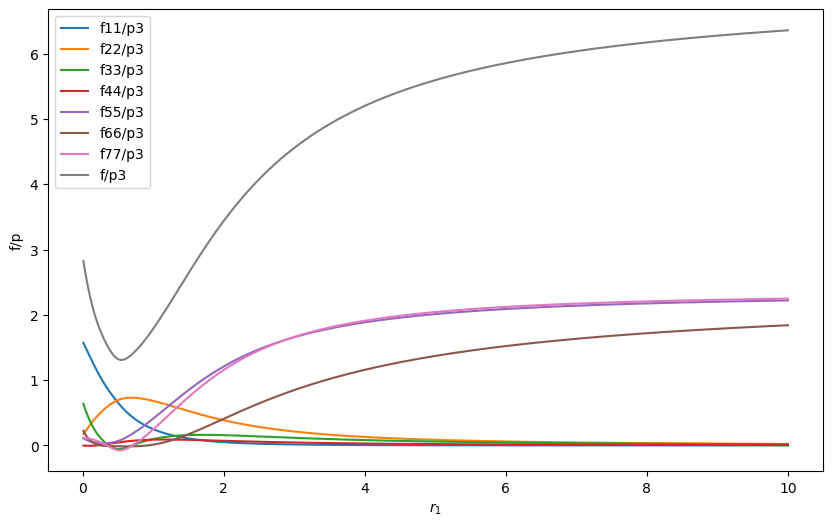

In [69]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(r1, f11_over_p3, label='f11/p3')
ax.plot(r1, f22_over_p3, label='f22/p3')
ax.plot(r1, f33_over_p3, label='f33/p3')
ax.plot(r1, f44_over_p3, label='f44/p3')
ax.plot(r1, f55_over_p3, label='f55/p3')
ax.plot(r1, f66_over_p3, label='f66/p3')
ax.plot(r1, f77_over_p3, label='f77/p3')
ax.plot(r1, f_over_p3, label='f/p3')

ax.set_xlabel('$r_1$')
ax.set_ylabel('f/p')
ax.legend()

plt.show()

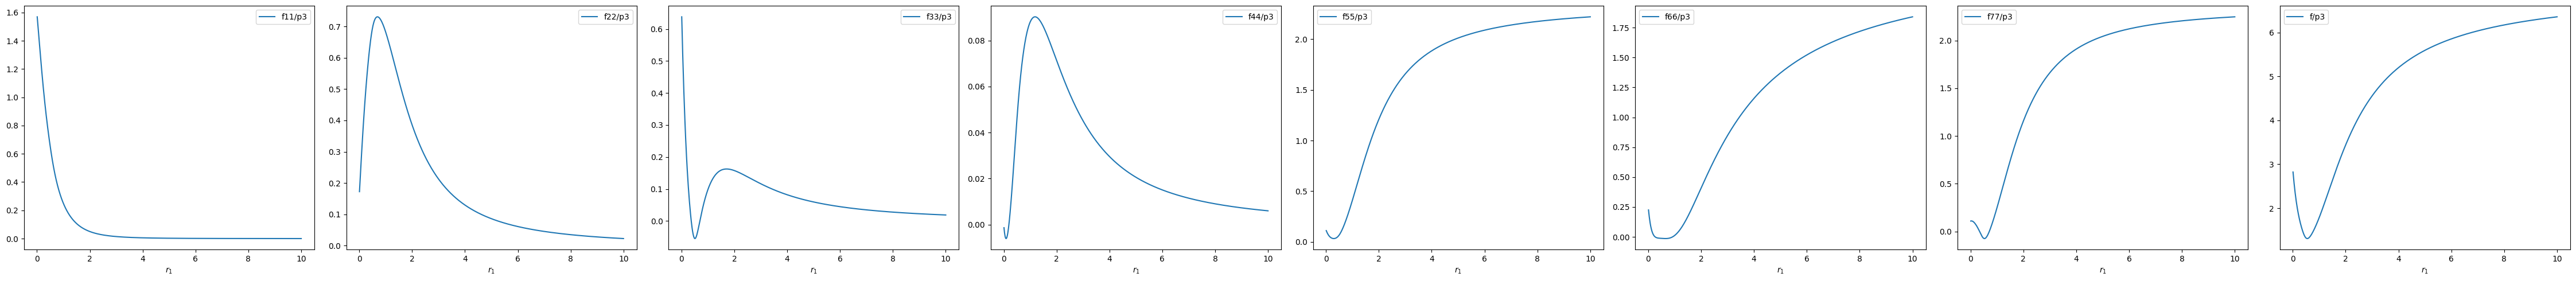

In [70]:
fig, axes = plt.subplots(1,8 ,figsize=(45,5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# List of y data to plot
functions = [f11_over_p3, f22_over_p3, f33_over_p3, f44_over_p3, f55_over_p3, f66_over_p3, f77_over_p3, f_over_p3]
titles = ['f11/p3', 'f22/p3', 'f33/p3', 'f44/p3', 'f55/p3', 'f66/p3', 'f77/p3', 'f/p3']

# Plot each y data on a subplot
for i, ax in enumerate(axes):
    ax.plot(r1, functions[i], label =titles[i])
    ax.set_xlabel('$r_1$')
    ax.legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [71]:
coefficients_4 = tf.Variable(np.random.uniform(-1, -0.99, size=(7,)), dtype=tf.float32)
coefficients_4  # The coefficients chosen are all very close to -1

<tf.Variable 'Variable:0' shape=(7,) dtype=float32, numpy=
array([-0.99908555, -0.99380255, -0.99256927, -0.9923859 , -0.99874645,
       -0.99367595, -0.99747455], dtype=float32)>

In [72]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)  # Using Stochastic Gradient Descent(SGD) as an optimizer
# optimizer.build([coefficients])
# Training step
@tf.function
def train_step_4():

    with tf.GradientTape() as tape:

        p_4 = sampling_function(coefficients_4, f)
        loss_4 = variance_loss(f, p_4)

    gradients_4 = tape.gradient(loss_4, [coefficients_4])
    clipped_gradients = [tf.clip_by_value(grad, -1,1) for grad in gradients_4]
    optimizer.apply_gradients(zip(gradients_4, [coefficients_4]))

    return loss_4

In [73]:
# Training loop
epochs = 1000
for epoch in range(epochs):
    loss_4 = train_step_4()
    if epoch % 100 == 0:
      print(f'Epoch {epoch}, Loss: {loss_4.numpy()}')

Epoch 0, Loss: 0.09806366264820099
Epoch 100, Loss: 0.09138278663158417
Epoch 200, Loss: 0.08591152727603912
Epoch 300, Loss: 0.08132289350032806
Epoch 400, Loss: 0.07740189880132675
Epoch 500, Loss: 0.0740005299448967
Epoch 600, Loss: 0.07101300358772278
Epoch 700, Loss: 0.06836148351430893
Epoch 800, Loss: 0.06598730385303497
Epoch 900, Loss: 0.06384514272212982


In [74]:
# Best coefficients
best_coefficients_4 = coefficients_4.numpy()
print("Best coefficients:", best_coefficients_4)

Best coefficients: [-1.2359426 -1.240587  -1.0334713 -1.0153315 -1.3347462 -1.1519953
 -1.2982322]


In [75]:
p_4 = best_coefficients_4[0] * F_11_2d + best_coefficients_4[1] * F_22_2d + best_coefficients_4[2] * F_33_2d + best_coefficients_4[3]  * F_44_2d + best_coefficients_4[4] * F_55_2d + best_coefficients_4[5] * F_66_2d + best_coefficients_4[6] * F_77_2d
p_4 = p_4/-1.3347462
## An array of 100 elements

In [77]:
# The final optimized coefficients after normalization (that are included in p_4)

coefficients_normalized_4 = best_coefficients_4/-1.3347462
print("Best coefficients after normalization:", coefficients_normalized_4)

Best coefficients after normalization: [0.92597574 0.92945534 0.774283   0.76069254 1.         0.8630819
 0.97264344]


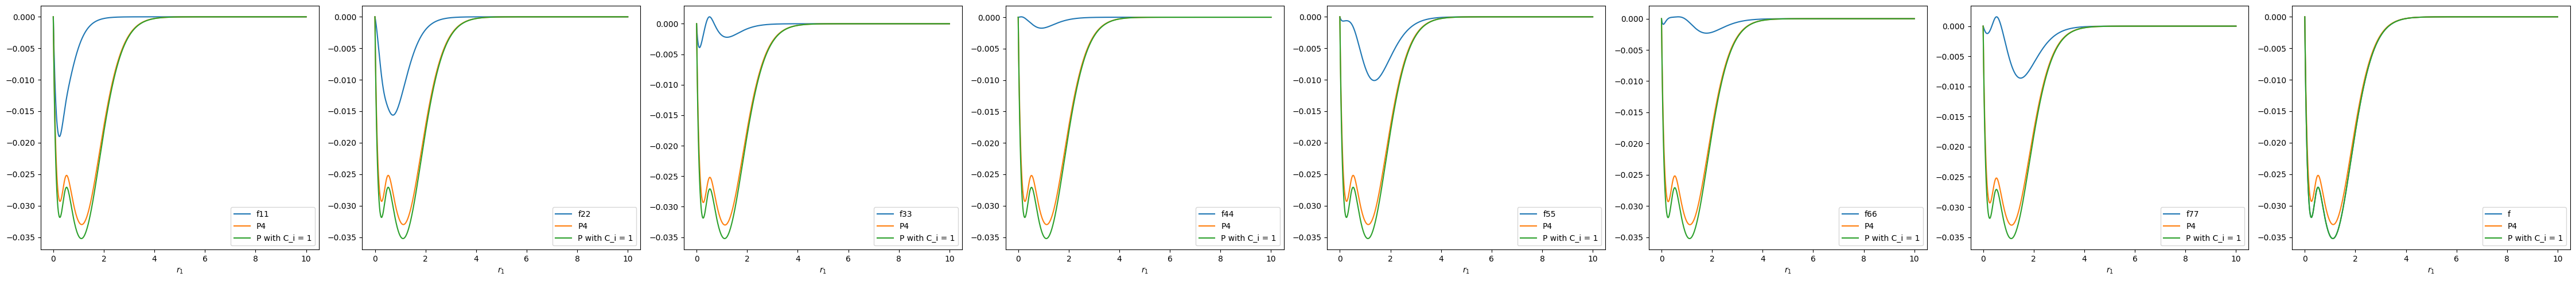

In [78]:
fig, axes = plt.subplots(1,8 ,figsize=(45,5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# List of y data to plot
functions = [F_11_2d, F_22_2d, F_33_2d, F_44_2d, F_55_2d, F_66_2d, F_77_2d, F_2d]
titles = ['f11', 'f22', 'f33', 'f44', 'f55', 'f66', 'f77', 'f']

# Plot each y data on a subplot
for i, ax in enumerate(axes):
    # ax = fig.add_subplot(projection='3d')
    ax.plot(r1, functions[i], label =titles[i])
    ax.plot(r1, p_4, label='P4')
    ax.plot(r1, F_2d, label='P with C_i = 1')
    ax.set_xlabel('$r_1$')
    ax.legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [79]:
f11_over_p4 = F_11_2d/p_4
f22_over_p4 = F_22_2d/p_4
f33_over_p4 = F_33_2d/p_4
f44_over_p4 = F_44_2d/p_4
f55_over_p4 = F_55_2d/p_4
f66_over_p4 = F_66_2d/p_4
f77_over_p4 = F_77_2d/p_4
f_over_p4 = F_2d/p_4

<ipython-input-79-4c95b8a9003b>:1: RuntimeWarning: invalid value encountered in divide
  f11_over_p4 = F_11_2d/p_4
<ipython-input-79-4c95b8a9003b>:2: RuntimeWarning: invalid value encountered in divide
  f22_over_p4 = F_22_2d/p_4
<ipython-input-79-4c95b8a9003b>:3: RuntimeWarning: invalid value encountered in divide
  f33_over_p4 = F_33_2d/p_4
<ipython-input-79-4c95b8a9003b>:4: RuntimeWarning: invalid value encountered in divide
  f44_over_p4 = F_44_2d/p_4
<ipython-input-79-4c95b8a9003b>:5: RuntimeWarning: invalid value encountered in divide
  f55_over_p4 = F_55_2d/p_4
<ipython-input-79-4c95b8a9003b>:6: RuntimeWarning: invalid value encountered in divide
  f66_over_p4 = F_66_2d/p_4
<ipython-input-79-4c95b8a9003b>:7: RuntimeWarning: invalid value encountered in divide
  f77_over_p4 = F_77_2d/p_4
<ipython-input-79-4c95b8a9003b>:8: RuntimeWarning: invalid value encountered in divide
  f_over_p4 = F_2d/p_4


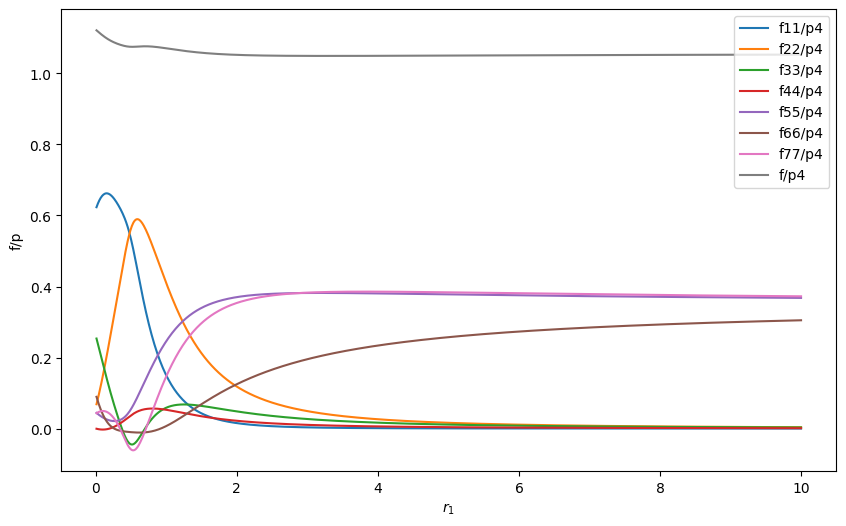

In [80]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(r1, f11_over_p4, label='f11/p4')
ax.plot(r1, f22_over_p4, label='f22/p4')
ax.plot(r1, f33_over_p4, label='f33/p4')
ax.plot(r1, f44_over_p4, label='f44/p4')
ax.plot(r1, f55_over_p4, label='f55/p4')
ax.plot(r1, f66_over_p4, label='f66/p4')
ax.plot(r1, f77_over_p4, label='f77/p4')
ax.plot(r1, f_over_p4, label='f/p4')

ax.set_xlabel('$r_1$')
ax.set_ylabel('f/p')
ax.legend()

plt.show()

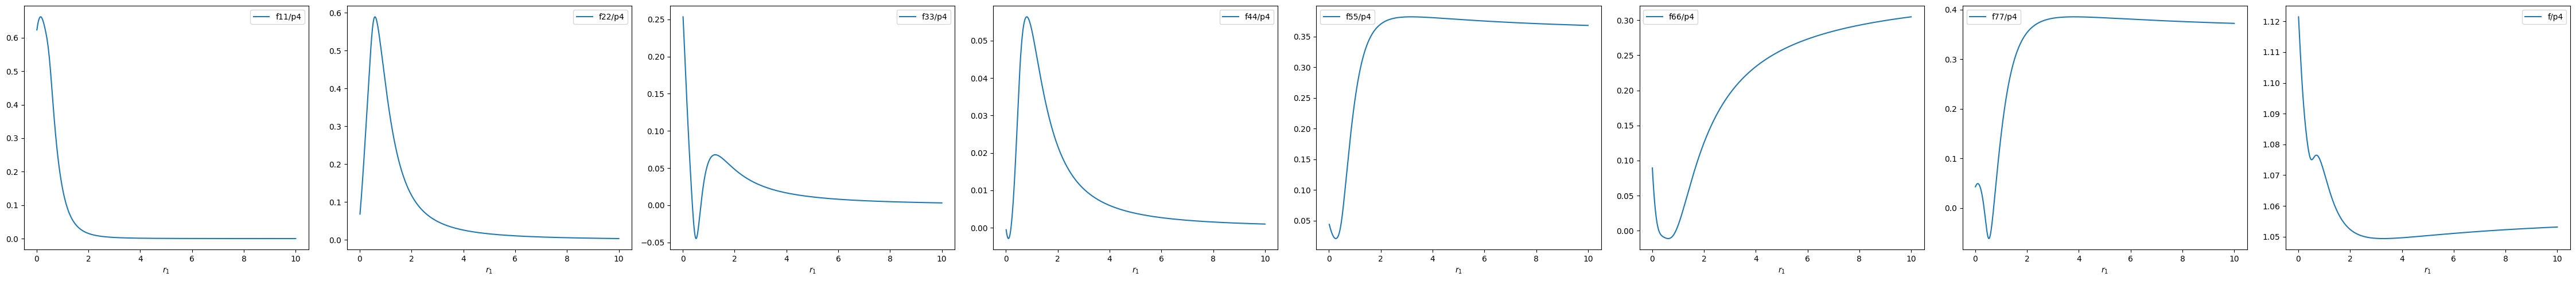

In [81]:
fig, axes = plt.subplots(1,8 ,figsize=(45,5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# List of y data to plot
functions = [f11_over_p4, f22_over_p4, f33_over_p4, f44_over_p4, f55_over_p4, f66_over_p4, f77_over_p4, f_over_p4]
titles = ['f11/p4', 'f22/p4', 'f33/p4', 'f44/p4', 'f55/p4', 'f66/p4', 'f77/p4', 'f/p4']

# Plot each y data on a subplot
for i, ax in enumerate(axes):
    ax.plot(r1, functions[i], label =titles[i])
    ax.set_xlabel('$r_1$')
    ax.legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [82]:
# Generate random numbers in the interval (-1, -0.99)
lower_interval = np.random.uniform(-1, -0.99, size=3)

# Generate random numbers in the interval (0.99, 1)
upper_interval = np.random.uniform(0.99, 1, size=4)

# Combine the two arrays
combined_array = np.concatenate((lower_interval, upper_interval))
np.random.shuffle(combined_array)

# Shuffle the array
coefficients_5 = tf.Variable(combined_array, dtype = tf.float32)
coefficients_5

## 3 coefficients are close to -1 and 4 coefficients are close to 1.

<tf.Variable 'Variable:0' shape=(7,) dtype=float32, numpy=
array([-0.9932295 ,  0.99504775,  0.9960057 ,  0.99159145, -0.9999509 ,
        0.99149233, -0.99419904], dtype=float32)>

In [83]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)  # Using Stochastic Gradient Descent(SGD) as an optimizer
# optimizer.build([coefficients])
# Training step
@tf.function
def train_step_5():

    with tf.GradientTape() as tape:

        p_5 = sampling_function(coefficients_5, f)
        loss_5 = variance_loss(f, p_5)

    gradients_5 = tape.gradient(loss_5, [coefficients_5])
    clipped_gradients = [tf.clip_by_value(grad, -1,1) for grad in gradients_5]
    optimizer.apply_gradients(zip(gradients_5, [coefficients_5]))

    return loss_5

In [84]:
# Training loop
epochs = 1000
for epoch in range(epochs):
    loss_5 = train_step_5()
    if epoch % 100 == 0:
      print(f'Epoch {epoch}, Loss: {loss_5.numpy()}')

Epoch 0, Loss: 95.61262512207031
Epoch 100, Loss: 0.0007946950499899685
Epoch 200, Loss: 0.0007946732803247869
Epoch 300, Loss: 0.0007946513360366225
Epoch 400, Loss: 0.0007946292753331363
Epoch 500, Loss: 0.0007946074474602938
Epoch 600, Loss: 0.0007945855031721294
Epoch 700, Loss: 0.0007945635006763041
Epoch 800, Loss: 0.0007945415563881397
Epoch 900, Loss: 0.0007945197285152972


In [85]:
# Best coefficients
best_coefficients_5 = coefficients_5.numpy()
print("Best coefficients:", best_coefficients_5)

Best coefficients: [  4.800639   -27.38269     -9.103494    -4.401264   -31.41249
  -0.34644872 -23.349209  ]


In [86]:
p_5 = best_coefficients_5[0] * F_11_2d + best_coefficients_5[1] * F_22_2d + best_coefficients_5[2] * F_33_2d + best_coefficients_5[3]  * F_44_2d + best_coefficients_5[4] * F_55_2d + best_coefficients_5[5] * F_66_2d + best_coefficients_5[6] * F_77_2d
p_5 = p_5/-31.41249
## An array of 100 elements

In [87]:
# The final optimized coefficients after normalization (that are included in p_5)

coefficients_normalized_5 = best_coefficients_5/-31.41249
print("Best coefficients after normalization:", coefficients_normalized_5)

Best coefficients after normalization: [-0.1528258   0.87171346  0.2898049   0.14011191  1.          0.01102901
  0.7433097 ]


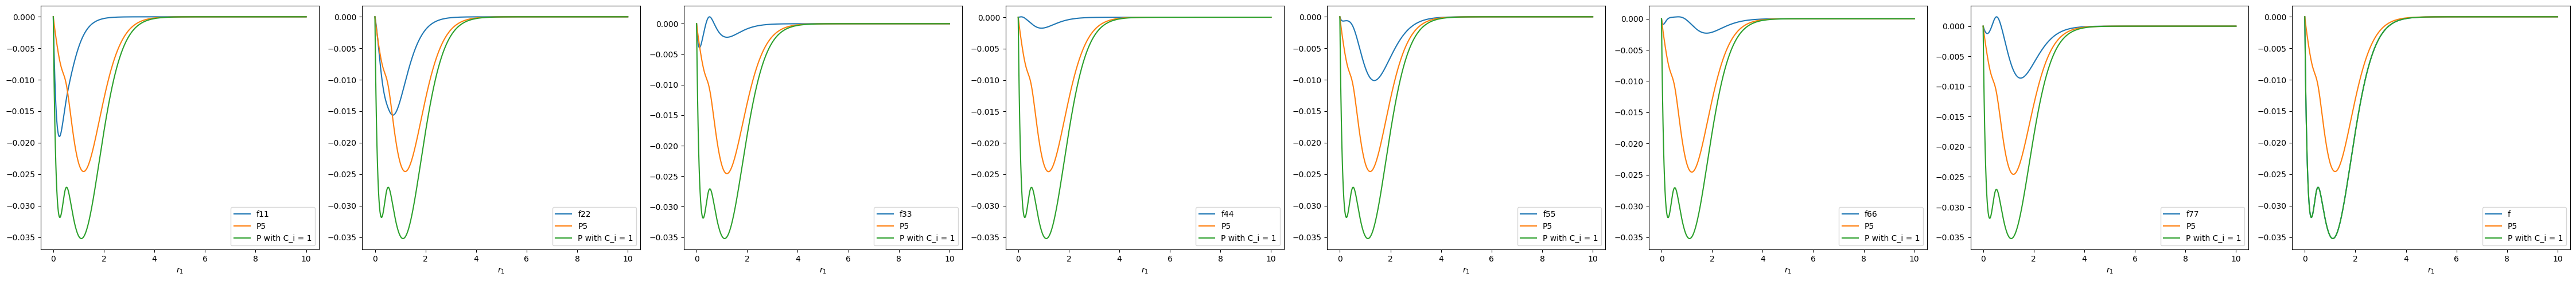

In [88]:
fig, axes = plt.subplots(1,8 ,figsize=(45,5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# List of y data to plot
functions = [F_11_2d, F_22_2d, F_33_2d, F_44_2d, F_55_2d, F_66_2d, F_77_2d, F_2d]
titles = ['f11', 'f22', 'f33', 'f44', 'f55', 'f66', 'f77', 'f']

# Plot each y data on a subplot
for i, ax in enumerate(axes):
    # ax = fig.add_subplot(projection='3d')
    ax.plot(r1, functions[i], label =titles[i])
    ax.plot(r1, p_5, label='P5')
    ax.plot(r1, F_2d, label='P with C_i = 1')
    ax.set_xlabel('$r_1$')
    ax.legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [89]:
f11_over_p5 = F_11_2d/p_5
f22_over_p5 = F_22_2d/p_5
f33_over_p5 = F_33_2d/p_5
f44_over_p5 = F_44_2d/p_5
f55_over_p5 = F_55_2d/p_5
f66_over_p5 = F_66_2d/p_5
f77_over_p5 = F_77_2d/p_5
f_over_p5 = F_2d/p_5

<ipython-input-89-4eb8625ef15a>:1: RuntimeWarning: invalid value encountered in divide
  f11_over_p5 = F_11_2d/p_5
<ipython-input-89-4eb8625ef15a>:2: RuntimeWarning: invalid value encountered in divide
  f22_over_p5 = F_22_2d/p_5
<ipython-input-89-4eb8625ef15a>:3: RuntimeWarning: invalid value encountered in divide
  f33_over_p5 = F_33_2d/p_5
<ipython-input-89-4eb8625ef15a>:4: RuntimeWarning: invalid value encountered in divide
  f44_over_p5 = F_44_2d/p_5
<ipython-input-89-4eb8625ef15a>:5: RuntimeWarning: invalid value encountered in divide
  f55_over_p5 = F_55_2d/p_5
<ipython-input-89-4eb8625ef15a>:6: RuntimeWarning: invalid value encountered in divide
  f66_over_p5 = F_66_2d/p_5
<ipython-input-89-4eb8625ef15a>:7: RuntimeWarning: invalid value encountered in divide
  f77_over_p5 = F_77_2d/p_5
<ipython-input-89-4eb8625ef15a>:8: RuntimeWarning: invalid value encountered in divide
  f_over_p5 = F_2d/p_5


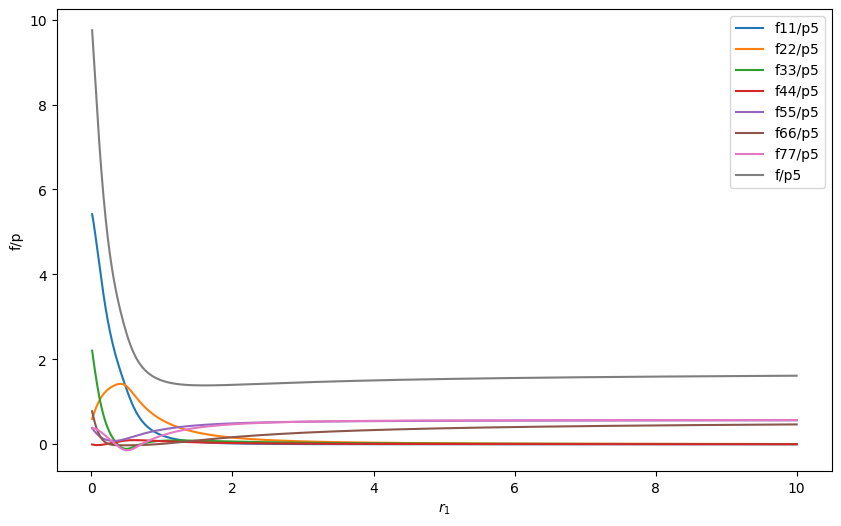

In [90]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(r1, f11_over_p5, label='f11/p5')
ax.plot(r1, f22_over_p5, label='f22/p5')
ax.plot(r1, f33_over_p5, label='f33/p5')
ax.plot(r1, f44_over_p5, label='f44/p5')
ax.plot(r1, f55_over_p5, label='f55/p5')
ax.plot(r1, f66_over_p5, label='f66/p5')
ax.plot(r1, f77_over_p5, label='f77/p5')
ax.plot(r1, f_over_p5, label='f/p5')

ax.set_xlabel('$r_1$')
ax.set_ylabel('f/p')
ax.legend()

plt.show()

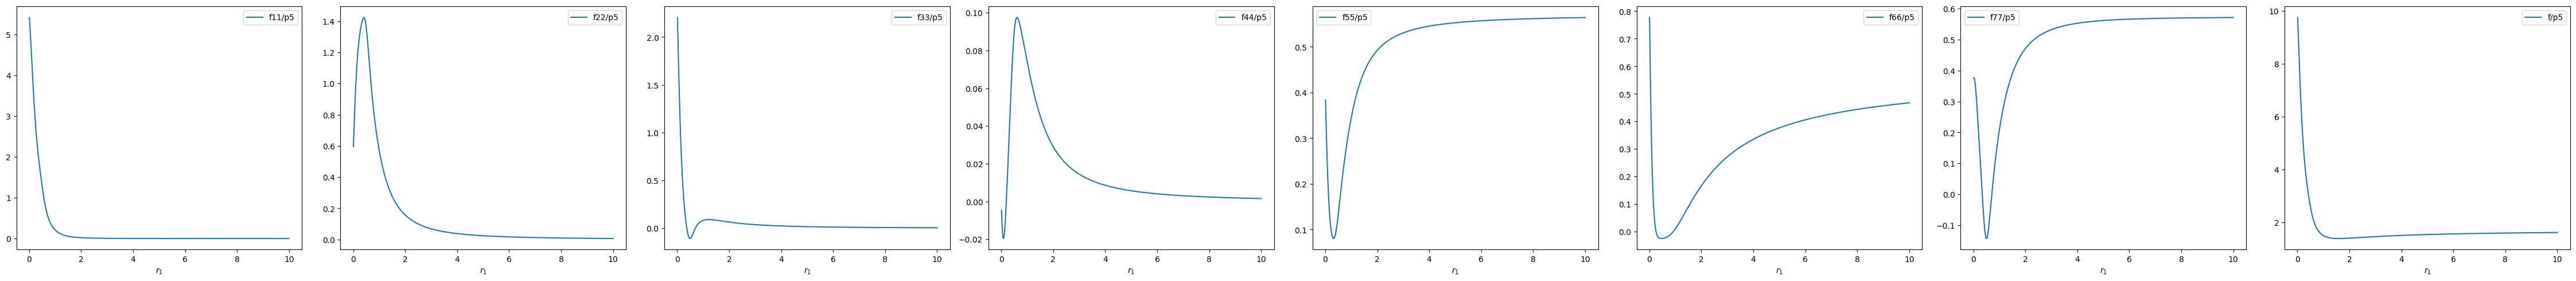

In [91]:
fig, axes = plt.subplots(1,8 ,figsize=(45,5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# List of y data to plot
functions = [f11_over_p5, f22_over_p5, f33_over_p5, f44_over_p5, f55_over_p5, f66_over_p5, f77_over_p5, f_over_p5]
titles = ['f11/p5', 'f22/p5', 'f33/p5', 'f44/p5', 'f55/p5', 'f66/p5', 'f77/p5', 'f/p5']

# Plot each y data on a subplot
for i, ax in enumerate(axes):
    ax.plot(r1, functions[i], label =titles[i])
    ax.set_xlabel('$r_1$')
    ax.legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [92]:
# Generate random numbers in the interval (-1, -0.99)
lower_interval = np.random.uniform(-1, -0.99, size=4)

# Generate random numbers in the interval (0.99, 1)
upper_interval = np.random.uniform(0.99, 1, size=3)

# Combine the two arrays
combined_array = np.concatenate((lower_interval, upper_interval))
np.random.shuffle(combined_array)

# Shuffle the array
coefficients_6 = tf.Variable(combined_array, dtype = tf.float32)
coefficients_6

## 4 coefficients are close to -1 and 3 coefficients are close to 1.

<tf.Variable 'Variable:0' shape=(7,) dtype=float32, numpy=
array([ 0.9987776 , -0.9939182 , -0.9908156 , -0.99220765, -0.99240315,
        0.99939305,  0.9903942 ], dtype=float32)>

In [93]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)  # Using Stochastic Gradient Descent(SGD) as an optimizer
# optimizer.build([coefficients])
# Training step
@tf.function
def train_step_6():

    with tf.GradientTape() as tape:

        p_6 = sampling_function(coefficients_6, f)
        loss_6 = variance_loss(f, p_6)

    gradients_6 = tape.gradient(loss_6, [coefficients_6])
    clipped_gradients = [tf.clip_by_value(grad, -1,1) for grad in gradients_6]
    optimizer.apply_gradients(zip(gradients_6, [coefficients_6]))

    return loss_6

In [94]:
# Training loop
epochs = 1000
for epoch in range(epochs):
    loss_6 = train_step_6()
    if epoch % 100 == 0:
      print(f'Epoch {epoch}, Loss: {loss_6.numpy()}')

Epoch 0, Loss: 2362.17138671875
Epoch 100, Loss: 1.173607655502451e-09
Epoch 200, Loss: 1.173607655502451e-09
Epoch 300, Loss: 1.173607655502451e-09
Epoch 400, Loss: 1.173607655502451e-09
Epoch 500, Loss: 1.173607655502451e-09
Epoch 600, Loss: 1.173607655502451e-09
Epoch 700, Loss: 1.173607655502451e-09
Epoch 800, Loss: 1.173607655502451e-09
Epoch 900, Loss: 1.173607655502451e-09


In [95]:
# Best coefficients
best_coefficients_6 = coefficients_6.numpy()
print("Best coefficients:", best_coefficients_6)

Best coefficients: [  -967.15533  -8660.859    -3890.7944   -1671.3815  -35227.355
 -13663.7295  -34343.848  ]


In [96]:
p_6 = best_coefficients_6[0] * F_11_2d + best_coefficients_6[1] * F_22_2d + best_coefficients_6[2] * F_33_2d + best_coefficients_6[3]  * F_44_2d + best_coefficients_6[4] * F_55_2d + best_coefficients_6[5] * F_66_2d + best_coefficients_6[6] * F_77_2d
p_6 = p_6/-35227.355

## An array of 100 elements

In [97]:
# The final optimized coefficients after normalization (that are included in p_6)

coefficients_normalized_6 = best_coefficients_6/-35227.355
print("Best coefficients after normalization:", coefficients_normalized_6)

Best coefficients after normalization: [0.02745467 0.24585608 0.1104481  0.04744555 1.         0.3878727
 0.97491986]


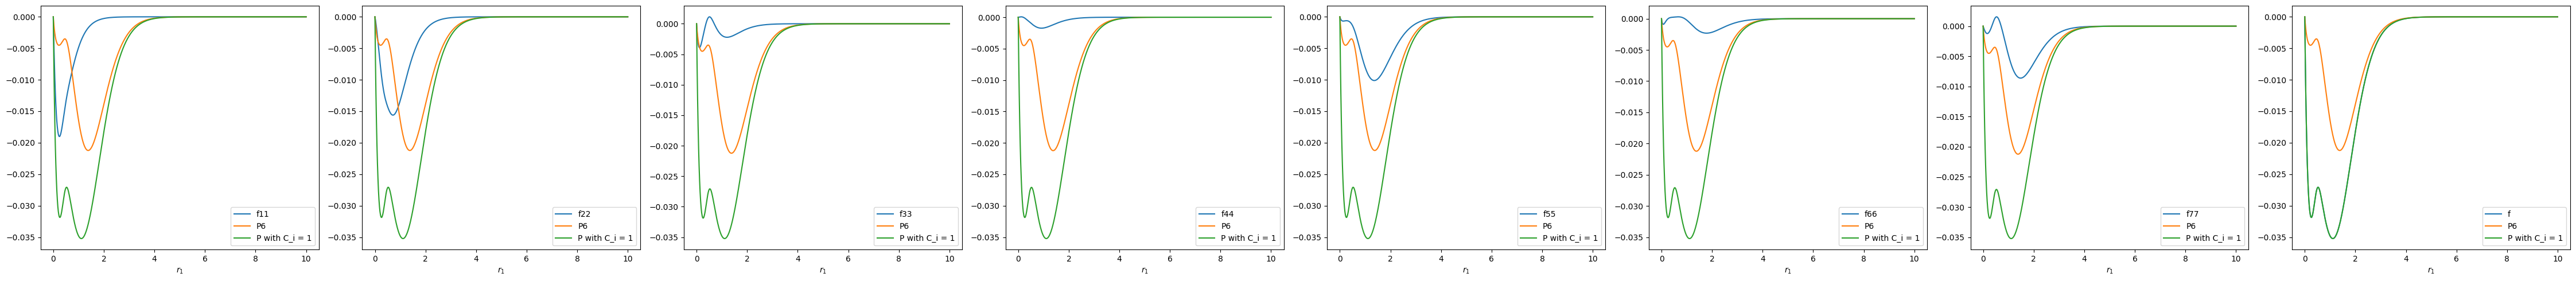

In [98]:
fig, axes = plt.subplots(1,8 ,figsize=(45,5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# List of y data to plot
functions = [F_11_2d, F_22_2d, F_33_2d, F_44_2d, F_55_2d, F_66_2d, F_77_2d, F_2d]
titles = ['f11', 'f22', 'f33', 'f44', 'f55', 'f66', 'f77', 'f']

# Plot each y data on a subplot
for i, ax in enumerate(axes):
    # ax = fig.add_subplot(projection='3d')
    ax.plot(r1, functions[i], label =titles[i])
    ax.plot(r1, p_6, label='P6')
    ax.plot(r1, F_2d, label='P with C_i = 1')
    ax.set_xlabel('$r_1$')
    ax.legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [99]:
f11_over_p6 = F_11_2d/p_6
f22_over_p6 = F_22_2d/p_6
f33_over_p6 = F_33_2d/p_6
f44_over_p6 = F_44_2d/p_6
f55_over_p6 = F_55_2d/p_6
f66_over_p6 = F_66_2d/p_6
f77_over_p6 = F_77_2d/p_6
f_over_p6 = F_2d/p_6

<ipython-input-99-b49082f8c6a2>:1: RuntimeWarning: invalid value encountered in divide
  f11_over_p6 = F_11_2d/p_6
<ipython-input-99-b49082f8c6a2>:2: RuntimeWarning: invalid value encountered in divide
  f22_over_p6 = F_22_2d/p_6
<ipython-input-99-b49082f8c6a2>:3: RuntimeWarning: invalid value encountered in divide
  f33_over_p6 = F_33_2d/p_6
<ipython-input-99-b49082f8c6a2>:4: RuntimeWarning: invalid value encountered in divide
  f44_over_p6 = F_44_2d/p_6
<ipython-input-99-b49082f8c6a2>:5: RuntimeWarning: invalid value encountered in divide
  f55_over_p6 = F_55_2d/p_6
<ipython-input-99-b49082f8c6a2>:6: RuntimeWarning: invalid value encountered in divide
  f66_over_p6 = F_66_2d/p_6
<ipython-input-99-b49082f8c6a2>:7: RuntimeWarning: invalid value encountered in divide
  f77_over_p6 = F_77_2d/p_6
<ipython-input-99-b49082f8c6a2>:8: RuntimeWarning: invalid value encountered in divide
  f_over_p6 = F_2d/p_6


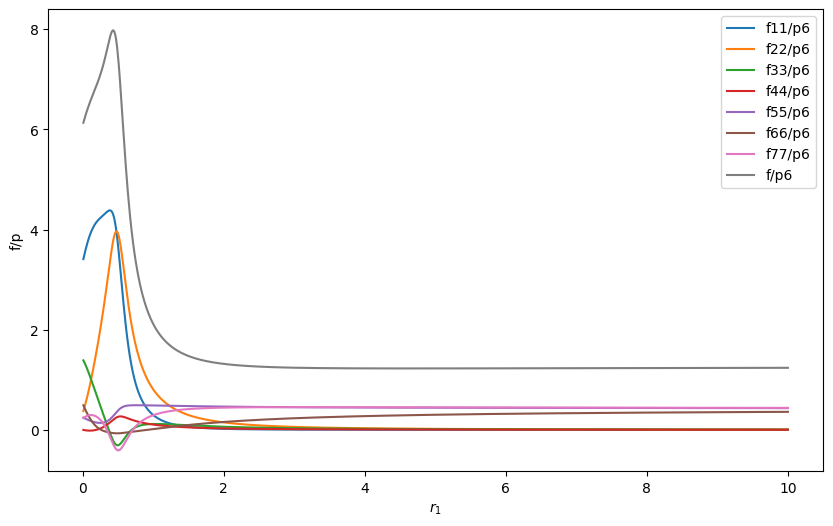

In [100]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(r1, f11_over_p6, label='f11/p6')
ax.plot(r1, f22_over_p6, label='f22/p6')
ax.plot(r1, f33_over_p6, label='f33/p6')
ax.plot(r1, f44_over_p6, label='f44/p6')
ax.plot(r1, f55_over_p6, label='f55/p6')
ax.plot(r1, f66_over_p6, label='f66/p6')
ax.plot(r1, f77_over_p6, label='f77/p6')
ax.plot(r1, f_over_p6, label='f/p6')

ax.set_xlabel('$r_1$')
ax.set_ylabel('f/p')
ax.legend()

plt.show()

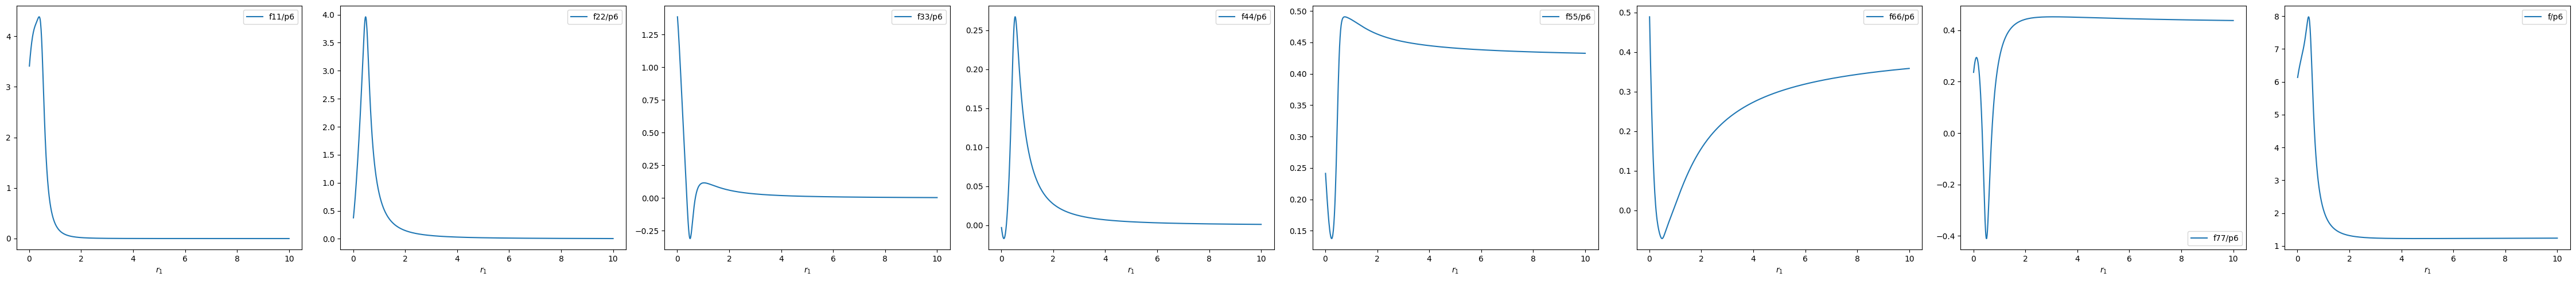

In [101]:
fig, axes = plt.subplots(1,8 ,figsize=(45,5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# List of y data to plot
functions = [f11_over_p6, f22_over_p6, f33_over_p6, f44_over_p6, f55_over_p6, f66_over_p6, f77_over_p6, f_over_p6]
titles = ['f11/p6', 'f22/p6', 'f33/p6', 'f44/p6', 'f55/p6', 'f66/p6', 'f77/p6', 'f/p6']

# Plot each y data on a subplot
for i, ax in enumerate(axes):
    ax.plot(r1, functions[i], label =titles[i])
    ax.set_xlabel('$r_1$')
    ax.legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [102]:
coefficients_7 = tf.Variable(np.zeros(7), dtype=tf.float32)
coefficients_7

<tf.Variable 'Variable:0' shape=(7,) dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0.], dtype=float32)>

In [103]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)  # Using Stochastic Gradient Descent(SGD) as an optimizer

# Training step
@tf.function
def train_step_7():

    with tf.GradientTape() as tape:

        p_7 = sampling_function(coefficients_7, f)
        loss_7 = variance_loss(f, p_7)

    gradients_7 = tape.gradient(loss_7, [coefficients_7])
    clipped_gradients = [tf.clip_by_value(grad, -1,1) for grad in gradients_7]
    optimizer.apply_gradients(zip(gradients_7, [coefficients_7]))

    return loss_7

In [104]:
# Training loop
epochs = 1000
for epoch in range(epochs):
    loss_7 = train_step_7()
    if epoch % 100 == 0:
      print(f'Epoch {epoch}, Loss: {loss_7.numpy()}')

Epoch 0, Loss: 48202468.0
Epoch 100, Loss: 4.358066488514549e-21
Epoch 200, Loss: 4.358066488514549e-21
Epoch 300, Loss: 4.358066488514549e-21
Epoch 400, Loss: 4.358066488514549e-21
Epoch 500, Loss: 4.358066488514549e-21
Epoch 600, Loss: 4.358066488514549e-21
Epoch 700, Loss: 4.358066488514549e-21
Epoch 800, Loss: 4.358066488514549e-21
Epoch 900, Loss: 4.358066488514549e-21


In [105]:
# Best coefficients
best_coefficients_7 = coefficients_7.numpy()
print("Best coefficients:", best_coefficients_7)

Best coefficients: [-8.3947131e+09 -9.9680440e+09 -1.1188115e+09 -9.2543091e+08
 -4.7601649e+09 -5.3378198e+08 -2.9638269e+09]


In [106]:
p_7 = best_coefficients_7[0] * F_11_2d + best_coefficients_7[1] * F_22_2d + best_coefficients_7[2] * F_33_2d + best_coefficients_7[3]  * F_44_2d + best_coefficients_7[4] * F_55_2d + best_coefficients_7[5] * F_66_2d + best_coefficients_7[6] * F_77_2d
p_7 = p_7/-9.9680440e+09
## An array of 100 elements

In [107]:
# The final optimized coefficients after normalization (that are included in p_7)

coefficients_normalized_7 = best_coefficients_7/-9.9680440e+09
print("Best coefficients after normalization:", coefficients_normalized_7)

Best coefficients after normalization: [0.84216255 1.         0.11223982 0.09283977 0.47754252 0.05354932
 0.29733285]


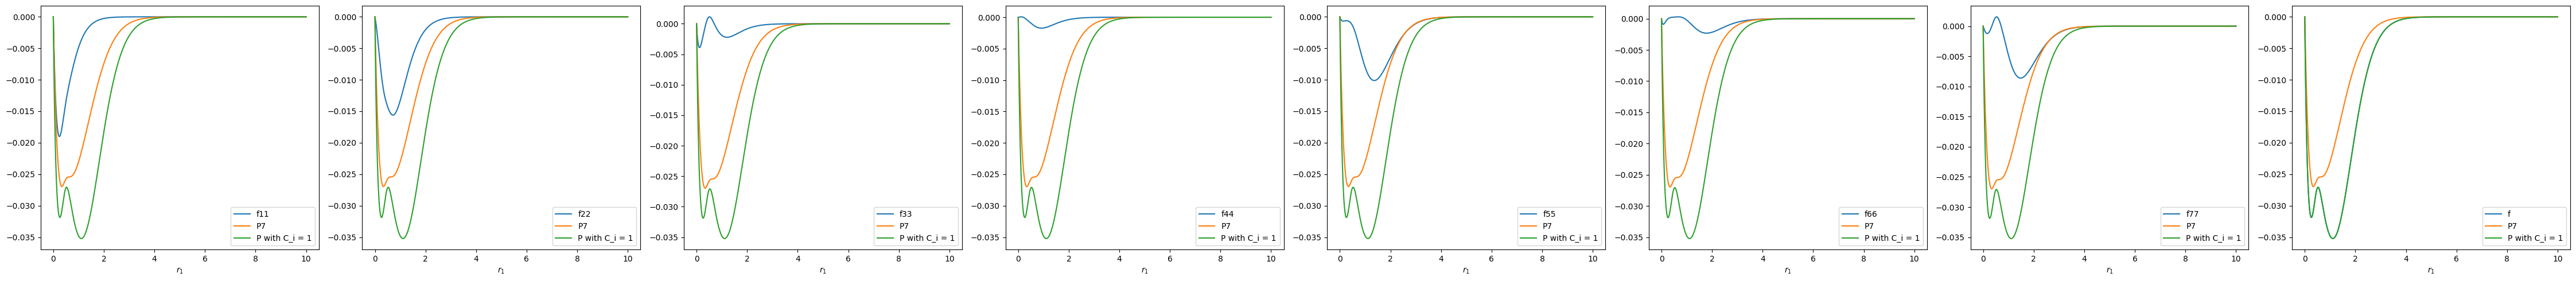

In [108]:
fig, axes = plt.subplots(1,8 ,figsize=(45,5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# List of y data to plot
functions = [F_11_2d, F_22_2d, F_33_2d, F_44_2d, F_55_2d, F_66_2d, F_77_2d, F_2d]
titles = ['f11', 'f22', 'f33', 'f44', 'f55', 'f66', 'f77', 'f']

# Plot each y data on a subplot
for i, ax in enumerate(axes):
    # ax = fig.add_subplot(projection='3d')
    ax.plot(r1, functions[i], label =titles[i])
    ax.plot(r1, p_7, label='P7')
    ax.plot(r1, F_2d, label='P with C_i = 1')
    ax.set_xlabel('$r_1$')
    ax.legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [109]:
f11_over_p7 = F_11_2d/p_7
f22_over_p7 = F_22_2d/p_7
f33_over_p7 = F_33_2d/p_7
f44_over_p7 = F_44_2d/p_7
f55_over_p7 = F_55_2d/p_7
f66_over_p7 = F_66_2d/p_7
f77_over_p7 = F_77_2d/p_7
f_over_p7 = F_2d/p_7

<ipython-input-109-25601c36698f>:1: RuntimeWarning: invalid value encountered in divide
  f11_over_p7 = F_11_2d/p_7
<ipython-input-109-25601c36698f>:2: RuntimeWarning: invalid value encountered in divide
  f22_over_p7 = F_22_2d/p_7
<ipython-input-109-25601c36698f>:3: RuntimeWarning: invalid value encountered in divide
  f33_over_p7 = F_33_2d/p_7
<ipython-input-109-25601c36698f>:4: RuntimeWarning: invalid value encountered in divide
  f44_over_p7 = F_44_2d/p_7
<ipython-input-109-25601c36698f>:5: RuntimeWarning: invalid value encountered in divide
  f55_over_p7 = F_55_2d/p_7
<ipython-input-109-25601c36698f>:6: RuntimeWarning: invalid value encountered in divide
  f66_over_p7 = F_66_2d/p_7
<ipython-input-109-25601c36698f>:7: RuntimeWarning: invalid value encountered in divide
  f77_over_p7 = F_77_2d/p_7
<ipython-input-109-25601c36698f>:8: RuntimeWarning: invalid value encountered in divide
  f_over_p7 = F_2d/p_7


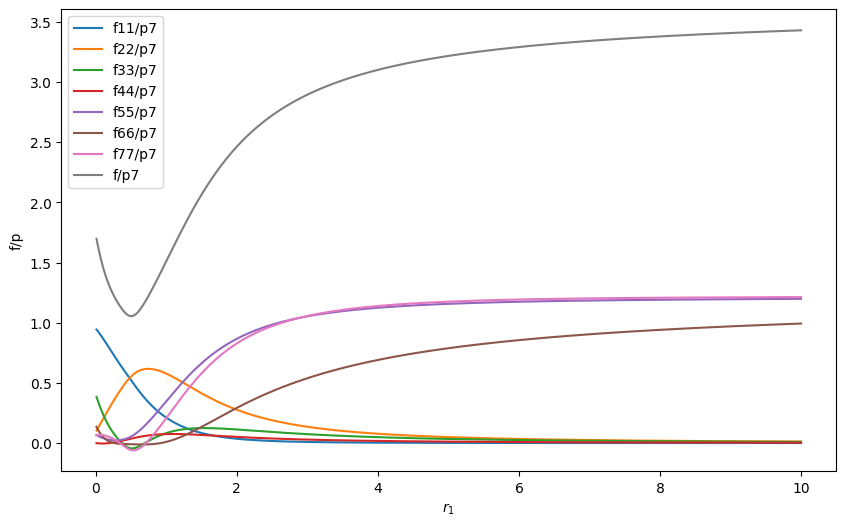

In [110]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(r1, f11_over_p7, label='f11/p7')
ax.plot(r1, f22_over_p7, label='f22/p7')
ax.plot(r1, f33_over_p7, label='f33/p7')
ax.plot(r1, f44_over_p7, label='f44/p7')
ax.plot(r1, f55_over_p7, label='f55/p7')
ax.plot(r1, f66_over_p7, label='f66/p7')
ax.plot(r1, f77_over_p7, label='f77/p7')
ax.plot(r1, f_over_p7, label='f/p7')

ax.set_xlabel('$r_1$')
ax.set_ylabel('f/p')
ax.legend()

plt.show()

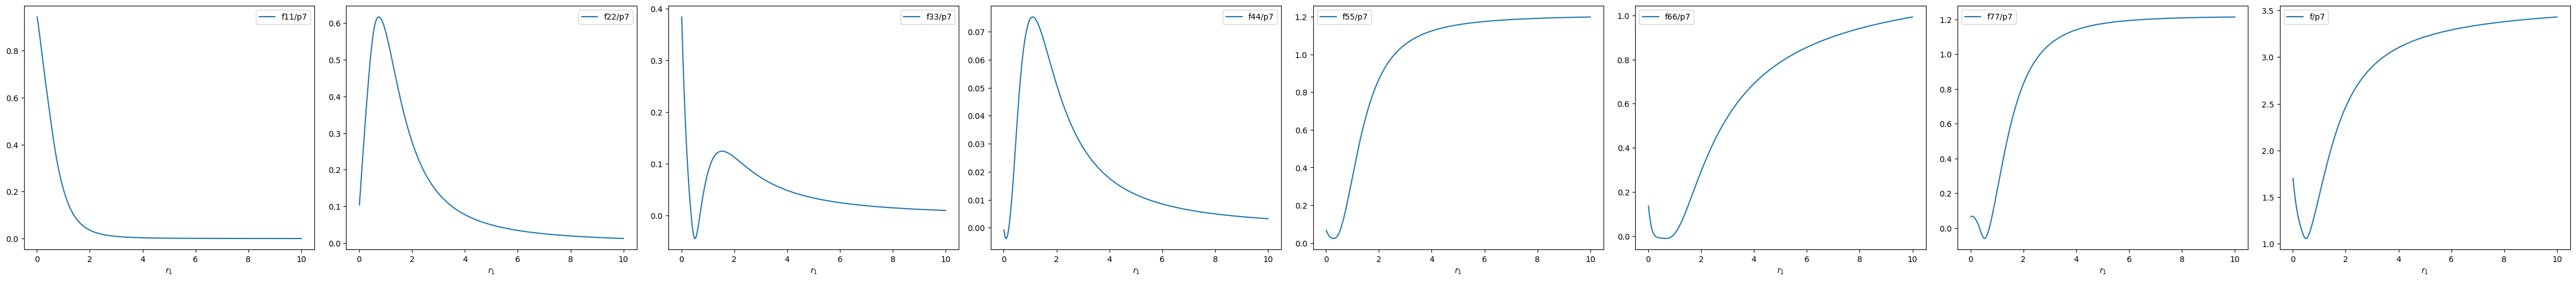

In [111]:
fig, axes = plt.subplots(1,8 ,figsize=(45,5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# List of y data to plot
functions = [f11_over_p7, f22_over_p7, f33_over_p7, f44_over_p7, f55_over_p7, f66_over_p7, f77_over_p7, f_over_p7]
titles = ['f11/p7', 'f22/p7', 'f33/p7', 'f44/p7', 'f55/p7', 'f66/p7', 'f77/p7', 'f/p7']

# Plot each y data on a subplot
for i, ax in enumerate(axes):
    ax.plot(r1, functions[i], label =titles[i])
    ax.set_xlabel('$r_1$')
    ax.legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [112]:
# Generate random numbers in the interval (-1, -0.5)
lower_interval = np.random.uniform(-1, -0.5, size=3)

# Generate random numbers in the interval (0.5, 1)
upper_interval = np.random.uniform(0.5, 1, size=4)

# Combine the two arrays
combined_array = np.concatenate((lower_interval, upper_interval))
np.random.shuffle(combined_array)

# Shuffle the array
coefficients_8 = tf.Variable(combined_array, dtype = tf.float32)
coefficients_8

## 3 coefficients lie between (-1, -0.5) and 4 coefficients lie between (0.5, 1)

<tf.Variable 'Variable:0' shape=(7,) dtype=float32, numpy=
array([ 0.7618916 ,  0.7740196 ,  0.7180562 , -0.7759832 , -0.9823481 ,
       -0.96042776,  0.76796687], dtype=float32)>

In [113]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)  # Using Stochastic Gradient Descent(SGD) as an optimizer
# optimizer.build([coefficients])
# Training step
@tf.function
def train_step_8():

    with tf.GradientTape() as tape:

        p_8 = sampling_function(coefficients_8, f)
        loss_8 = variance_loss(f, p_8)

    gradients_8 = tape.gradient(loss_8, [coefficients_8])
    clipped_gradients = [tf.clip_by_value(grad, -1,1) for grad in gradients_8]
    optimizer.apply_gradients(zip(gradients_8, [coefficients_8]))

    return loss_8

In [114]:
# Training loop
epochs = 1000
for epoch in range(epochs):
    loss_8 = train_step_8()
    if epoch % 100 == 0:
      print(f'Epoch {epoch}, Loss: {loss_8.numpy()}')

Epoch 0, Loss: 1999.20458984375
Epoch 100, Loss: 3.723829578028415e-10
Epoch 200, Loss: 3.723829578028415e-10
Epoch 300, Loss: 3.723829578028415e-10
Epoch 400, Loss: 3.723829578028415e-10
Epoch 500, Loss: 3.723829578028415e-10
Epoch 600, Loss: 3.723829578028415e-10
Epoch 700, Loss: 3.723829578028415e-10
Epoch 800, Loss: 3.723829578028415e-10
Epoch 900, Loss: 3.723829578028415e-10


In [115]:
# Best coefficients
best_coefficients_8 = coefficients_8.numpy()
print("Best coefficients:", best_coefficients_8)

Best coefficients: [ -3218.1235 -18144.861   -6044.548   -3080.546  -35513.434   -8596.249
 -32104.93  ]


In [116]:
p_8 = best_coefficients_8[0] * F_11_2d + best_coefficients_8[1] * F_22_2d + best_coefficients_8[2] * F_33_2d + best_coefficients_8[3]  * F_44_2d + best_coefficients_8[4] * F_55_2d + best_coefficients_8[5] * F_66_2d + best_coefficients_8[6] * F_77_2d
p_8 = p_8/-35513.434
## An array of 100 elements

In [117]:
# The final optimized coefficients after normalization (that are included in p_8)

coefficients_normalized_8 = best_coefficients_8/-35513.434
print("Best coefficients after normalization:", coefficients_normalized_8)

Best coefficients after normalization: [0.09061708 0.5109295  0.17020455 0.08674312 1.         0.24205627
 0.9040221 ]


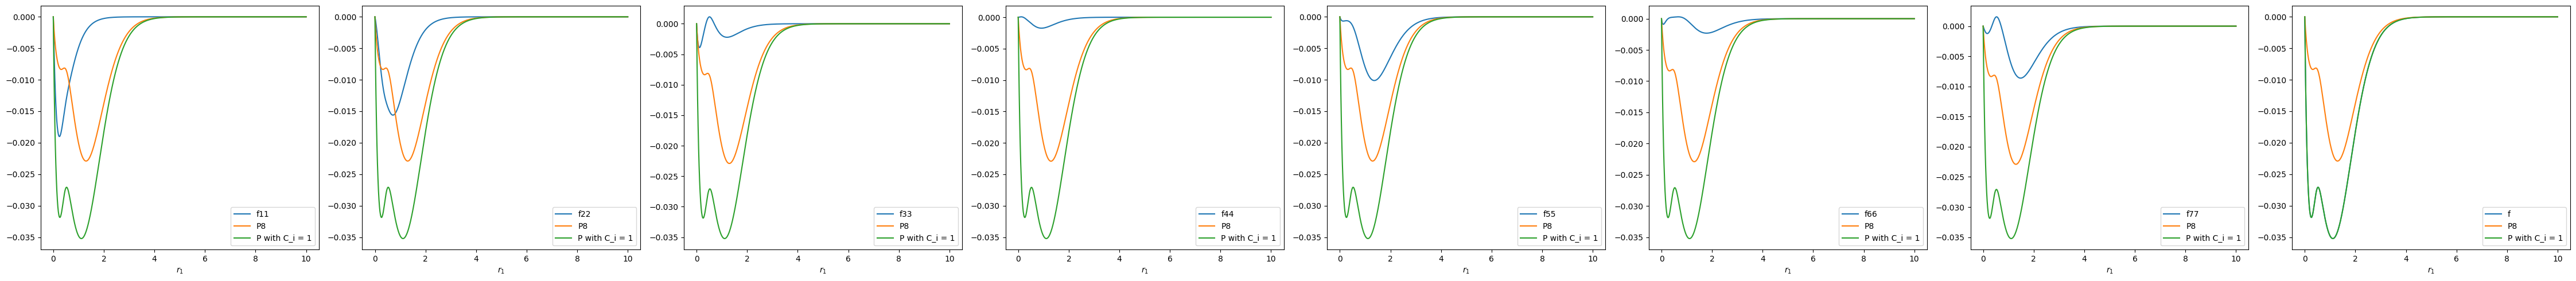

In [118]:
fig, axes = plt.subplots(1,8 ,figsize=(45,5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# List of y data to plot
functions = [F_11_2d, F_22_2d, F_33_2d, F_44_2d, F_55_2d, F_66_2d, F_77_2d, F_2d]
titles = ['f11', 'f22', 'f33', 'f44', 'f55', 'f66', 'f77', 'f']

# Plot each y data on a subplot
for i, ax in enumerate(axes):
    # ax = fig.add_subplot(projection='3d')
    ax.plot(r1, functions[i], label =titles[i])
    ax.plot(r1, p_8, label='P8')
    ax.plot(r1, F_2d, label='P with C_i = 1')
    ax.set_xlabel('$r_1$')
    ax.legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [119]:
f11_over_p8 = F_11_2d/p_8
f22_over_p8 = F_22_2d/p_8
f33_over_p8 = F_33_2d/p_8
f44_over_p8 = F_44_2d/p_8
f55_over_p8 = F_55_2d/p_8
f66_over_p8 = F_66_2d/p_8
f77_over_p8 = F_77_2d/p_8
f_over_p8 = F_2d/p_8

<ipython-input-119-fac33cc441d5>:1: RuntimeWarning: invalid value encountered in divide
  f11_over_p8 = F_11_2d/p_8
<ipython-input-119-fac33cc441d5>:2: RuntimeWarning: invalid value encountered in divide
  f22_over_p8 = F_22_2d/p_8
<ipython-input-119-fac33cc441d5>:3: RuntimeWarning: invalid value encountered in divide
  f33_over_p8 = F_33_2d/p_8
<ipython-input-119-fac33cc441d5>:4: RuntimeWarning: invalid value encountered in divide
  f44_over_p8 = F_44_2d/p_8
<ipython-input-119-fac33cc441d5>:5: RuntimeWarning: invalid value encountered in divide
  f55_over_p8 = F_55_2d/p_8
<ipython-input-119-fac33cc441d5>:6: RuntimeWarning: invalid value encountered in divide
  f66_over_p8 = F_66_2d/p_8
<ipython-input-119-fac33cc441d5>:7: RuntimeWarning: invalid value encountered in divide
  f77_over_p8 = F_77_2d/p_8
<ipython-input-119-fac33cc441d5>:8: RuntimeWarning: invalid value encountered in divide
  f_over_p8 = F_2d/p_8


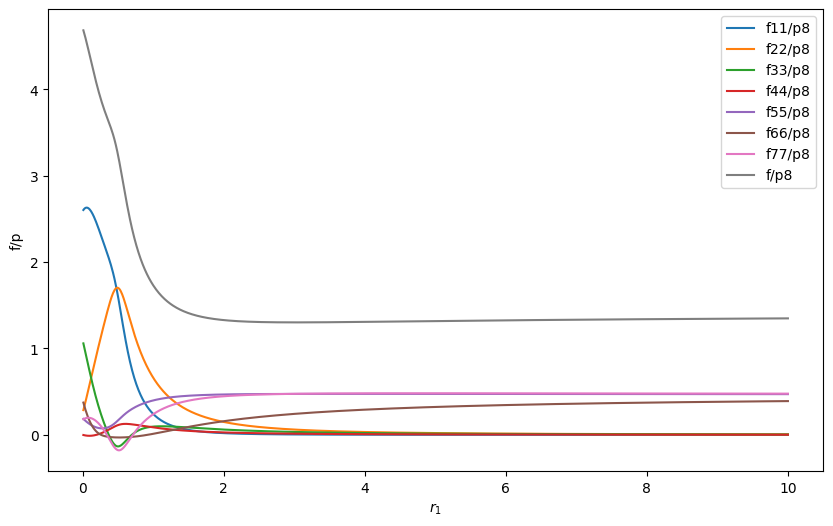

In [120]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(r1, f11_over_p8, label='f11/p8')
ax.plot(r1, f22_over_p8, label='f22/p8')
ax.plot(r1, f33_over_p8, label='f33/p8')
ax.plot(r1, f44_over_p8, label='f44/p8')
ax.plot(r1, f55_over_p8, label='f55/p8')
ax.plot(r1, f66_over_p8, label='f66/p8')
ax.plot(r1, f77_over_p8, label='f77/p8')
ax.plot(r1, f_over_p8, label='f/p8')

ax.set_xlabel('$r_1$')
ax.set_ylabel('f/p')
ax.legend()

plt.show()

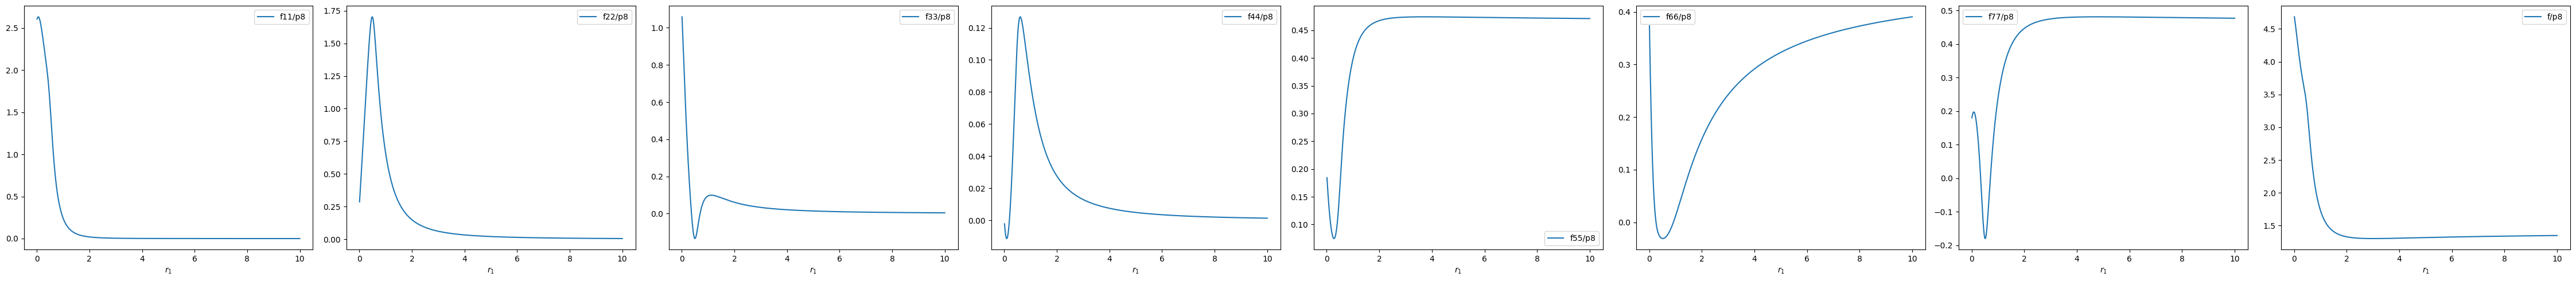

In [121]:
fig, axes = plt.subplots(1,8 ,figsize=(45,5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# List of y data to plot
functions = [f11_over_p8, f22_over_p8, f33_over_p8, f44_over_p8, f55_over_p8, f66_over_p8, f77_over_p8, f_over_p8]
titles = ['f11/p8', 'f22/p8', 'f33/p8', 'f44/p8', 'f55/p8', 'f66/p8', 'f77/p8', 'f/p8']

# Plot each y data on a subplot
for i, ax in enumerate(axes):
    ax.plot(r1, functions[i], label =titles[i])
    ax.set_xlabel('$r_1$')
    ax.legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [122]:
coefficients_9 = tf.Variable(np.random.uniform(-0.5, 0.5, size=(7,)), dtype=tf.float32)
coefficients_9

## The 7 coefficients lies between (-0.5, 0.5)

<tf.Variable 'Variable:0' shape=(7,) dtype=float32, numpy=
array([-0.24960595,  0.26147076,  0.46795717,  0.36635998, -0.09018998,
        0.08156269, -0.4375707 ], dtype=float32)>

In [123]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)  # Using Stochastic Gradient Descent(SGD) as an optimizer

# Training step
@tf.function
def train_step_9():

    with tf.GradientTape() as tape:

        p_9 = sampling_function(coefficients_9, f)
        loss_9 = variance_loss(f, p_9)

    gradients_9 = tape.gradient(loss_9, [coefficients_9])
    clipped_gradients = [tf.clip_by_value(grad, -1,1) for grad in gradients_9]
    optimizer.apply_gradients(zip(gradients_9, [coefficients_9]))

    return loss_9

In [124]:
# Training loop
epochs = 1000
for epoch in range(epochs):
    loss_9 = train_step_9()
    if epoch % 100 == 0:
      print(f'Epoch {epoch}, Loss: {loss_9.numpy()}')

Epoch 0, Loss: 1159.549560546875
Epoch 100, Loss: 0.011586347594857216
Epoch 200, Loss: 0.0084065031260252
Epoch 300, Loss: 0.006976397708058357
Epoch 400, Loss: 0.006143717095255852
Epoch 500, Loss: 0.005552904214709997
Epoch 600, Loss: 0.005144585855305195
Epoch 700, Loss: 0.004807370714843273
Epoch 800, Loss: 0.004523974843323231
Epoch 900, Loss: 0.004280950874090195


In [125]:
# Best coefficients
best_coefficients_9 = coefficients_9.numpy()
print("Best coefficients:", best_coefficients_9)

Best coefficients: [5236.967   4530.713   -354.44193  226.35472  120.61715 -107.4321
 -569.4911 ]


In [126]:
p_9 = best_coefficients_9[0] * F_11_2d + best_coefficients_9[1] * F_22_2d + best_coefficients_9[2] * F_33_2d + best_coefficients_9[3]  * F_44_2d + best_coefficients_9[4] * F_55_2d + best_coefficients_9[5] * F_66_2d + best_coefficients_9[6] * F_77_2d
p_9 = p_9/5236.967
## An array of 100 elements

In [127]:
# The final optimized coefficients after normalization (that are included in p_9)

coefficients_normalized_9 = best_coefficients_9/5236.967
print("Best coefficients after normalization:", coefficients_normalized_9)

Best coefficients after normalization: [ 1.          0.8651407  -0.06768077  0.04322249  0.02303187 -0.02051418
 -0.10874445]


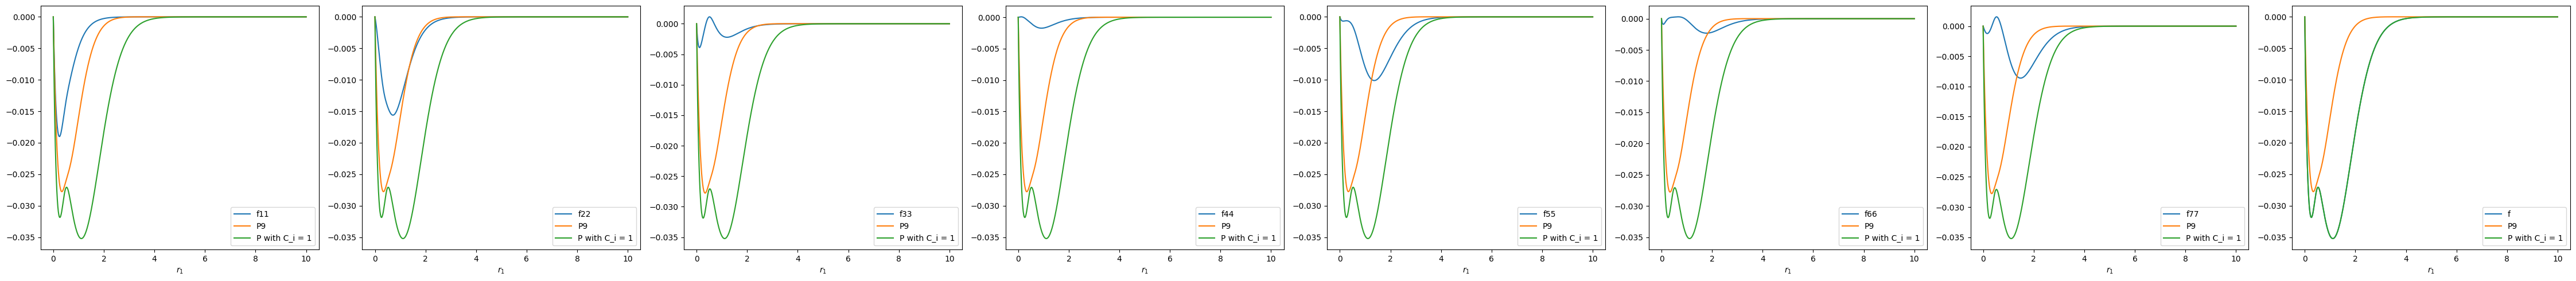

In [128]:
fig, axes = plt.subplots(1,8 ,figsize=(45,5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# List of y data to plot
functions = [F_11_2d, F_22_2d, F_33_2d, F_44_2d, F_55_2d, F_66_2d, F_77_2d, F_2d]
titles = ['f11', 'f22', 'f33', 'f44', 'f55', 'f66', 'f77', 'f']

# Plot each y data on a subplot
for i, ax in enumerate(axes):
    # ax = fig.add_subplot(projection='3d')
    ax.plot(r1, functions[i], label =titles[i])
    ax.plot(r1, p_9, label='P9')
    ax.plot(r1, F_2d, label='P with C_i = 1')
    ax.set_xlabel('$r_1$')
    ax.legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [129]:
f11_over_p9 = F_11_2d/p_9
f22_over_p9 = F_22_2d/p_9
f33_over_p9 = F_33_2d/p_9
f44_over_p9 = F_44_2d/p_9
f55_over_p9 = F_55_2d/p_9
f66_over_p9 = F_66_2d/p_9
f77_over_p9 = F_77_2d/p_9
f_over_p9 = F_2d/p_9

<ipython-input-129-8cc2eead7e7f>:1: RuntimeWarning: invalid value encountered in divide
  f11_over_p9 = F_11_2d/p_9
<ipython-input-129-8cc2eead7e7f>:2: RuntimeWarning: invalid value encountered in divide
  f22_over_p9 = F_22_2d/p_9
<ipython-input-129-8cc2eead7e7f>:3: RuntimeWarning: invalid value encountered in divide
  f33_over_p9 = F_33_2d/p_9
<ipython-input-129-8cc2eead7e7f>:4: RuntimeWarning: invalid value encountered in divide
  f44_over_p9 = F_44_2d/p_9
<ipython-input-129-8cc2eead7e7f>:5: RuntimeWarning: invalid value encountered in divide
  f55_over_p9 = F_55_2d/p_9
<ipython-input-129-8cc2eead7e7f>:6: RuntimeWarning: invalid value encountered in divide
  f66_over_p9 = F_66_2d/p_9
<ipython-input-129-8cc2eead7e7f>:7: RuntimeWarning: invalid value encountered in divide
  f77_over_p9 = F_77_2d/p_9
<ipython-input-129-8cc2eead7e7f>:8: RuntimeWarning: invalid value encountered in divide
  f_over_p9 = F_2d/p_9


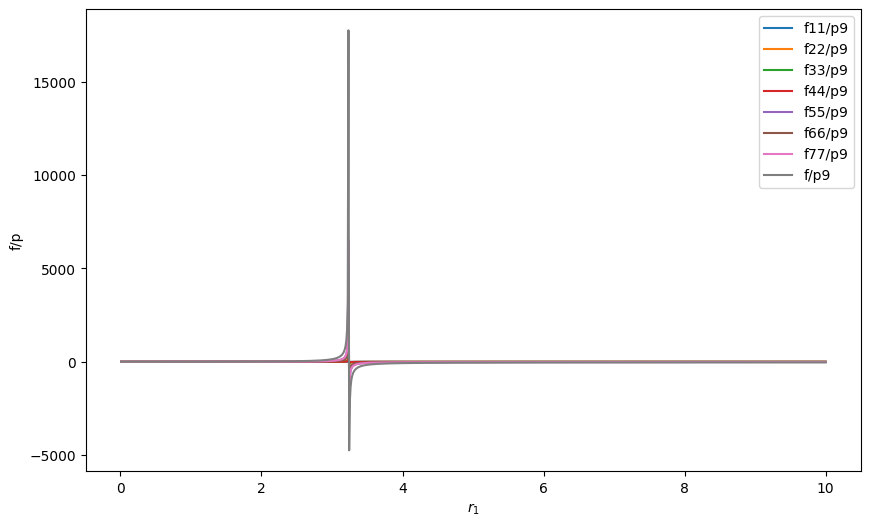

In [130]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(r1, f11_over_p9, label='f11/p9')
ax.plot(r1, f22_over_p9, label='f22/p9')
ax.plot(r1, f33_over_p9, label='f33/p9')
ax.plot(r1, f44_over_p9, label='f44/p9')
ax.plot(r1, f55_over_p9, label='f55/p9')
ax.plot(r1, f66_over_p9, label='f66/p9')
ax.plot(r1, f77_over_p9, label='f77/p9')
ax.plot(r1, f_over_p9, label='f/p9')

ax.set_xlabel('$r_1$')
ax.set_ylabel('f/p')
ax.legend()

plt.show()

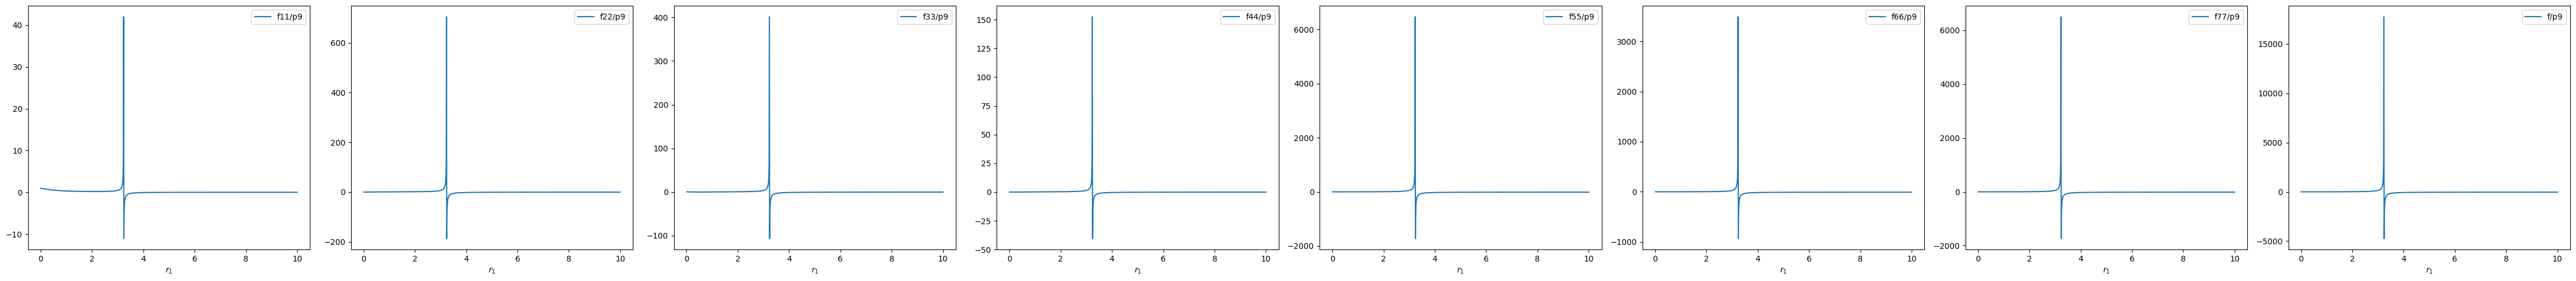

In [131]:
fig, axes = plt.subplots(1,8 ,figsize=(45,5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# List of y data to plot
functions = [f11_over_p9, f22_over_p9, f33_over_p9, f44_over_p9, f55_over_p9, f66_over_p9, f77_over_p9, f_over_p9]
titles = ['f11/p9', 'f22/p9', 'f33/p9', 'f44/p9', 'f55/p9', 'f66/p9', 'f77/p9', 'f/p9']

# Plot each y data on a subplot
for i, ax in enumerate(axes):
    ax.plot(r1, functions[i], label =titles[i])
    ax.set_xlabel('$r_1$')
    ax.legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

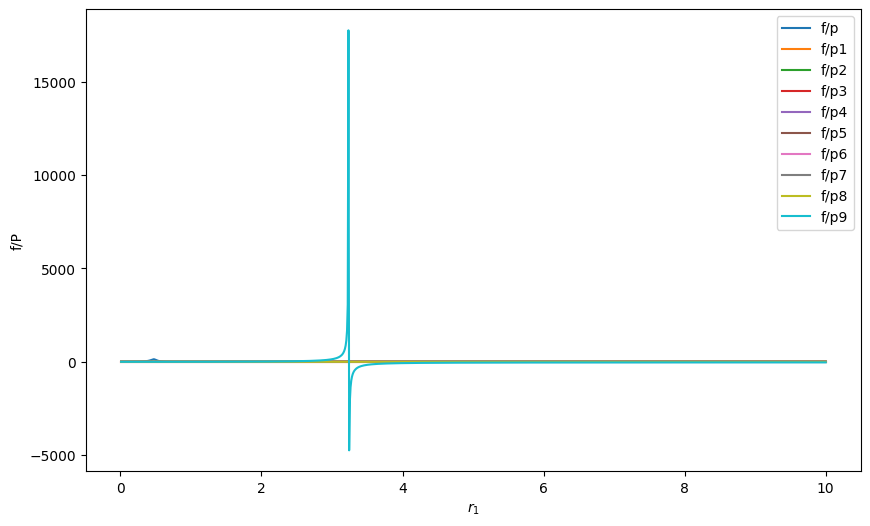

In [132]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(r1, f_over_p, label='f/p')
ax.plot(r1, f_over_p1, label='f/p1')
ax.plot(r1, f_over_p2, label='f/p2')
ax.plot(r1, f_over_p3, label='f/p3')
ax.plot(r1, f_over_p4, label='f/p4')
ax.plot(r1, f_over_p5, label='f/p5')
ax.plot(r1, f_over_p6, label='f/p6')
ax.plot(r1, f_over_p7, label='f/p7')
ax.plot(r1, f_over_p8, label='f/p8')
ax.plot(r1, f_over_p9, label='f/p9')

ax.legend()
ax.set_xlabel('$r_1$')
ax.set_ylabel('f/P')

plt.show()